### Installing the libraries

In [6]:
%pip install dill
%pip install path
%pip install route 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing the libraries

In [28]:
#Setting up paths

#Import dill library to save variables generated
import platform
import sys
import dill
import pickle
import path
import os

if platform.system() == "Windows":
    sys.path.append(rf'D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression\Closed_Form_Solver\Code Files')
    sys.path.append(rf'D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression\Closed_Form_Solver\Experimental Results\Tensor_Method\Closed Form')
elif platform.system() == "Darwin":
    sys.path.append()
    sys.path.append()
    
#Import Standard Data Analysis Libraries
import datetime
import numpy as np
import pandas as pd
import re
import scipy.io

#plotting functions
import matplotlib.pyplot as plt
import seaborn as sns



### Loading Data

In [52]:
#loading file path
if platform.system() == "Windows":
    pkl_file = rf"D:\Tensor Based ML for Neuro Imaging\INSPIRE_CAHBHIR\Python Scripts\LSR-Tensor-Ridge-Regression_All_Data\Closed_Form_Solver\LSR\Separation Rank 2\Normalize_Int_Removal\Frobenious\679\Results\HCP_lambdas_seed_3_[0.1, 0.4, 0.7, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 15, 20, 25, 30]_sep_2_tucker_[4 4].pkl"
elif platform.system() == "Darwin":
    pkl_file = f"/content/gdrive/MyDrive/The Pipeline/Experimental Results/16-16-4-4/Tensor Results/ExecutionTime_2024-03-11 21:17:28, n_train_300, n_test_100, p1_16, p2_16, d1_4, d2_4, S_1 _Dataset.pkl"
    

file= open(pkl_file, 'rb')
data = pickle.load(file)
file.close()

#old

# (X_train 0,Y_train 1,X_test 2,Y_test 3, 
# lambda1 4, validation_normalized_estimation_error 5, validation_nmse_losses 6, 
# validation_correlations 7, validation_R2_scores 8, objective_function_information 9,
# gradient_information 10,test_normalized_estimation_error 11, test_nmse_loss 12, test_R2_loss 13, 
# test_correlation 14, objective_function_values 15, gradient_values 16, iterate_level_values 17,
# iterate_level_reconstructed_tensor), file)

#new

X_train = data[0]
Y_train = data[1]
X_test  = data[2]
Y_test  = data[3]
lambda1 = data[4]
validation_normalized_estimation_error = data[5]
validation_nmse_losses = data[6]
validation_correlations = data[7]
validation_R2_scores = data[8]
objective_function_information = data[9]
gradient_information = data[10]
test_normalized_estimation_error = data[11]
test_nmse_loss = data[12]
test_R2_loss = data[13]
test_correlation = data[14]
objective_function_values = data[15]
gradient_values = data[16]
iterate_level_values = data[17]
factor_core_iterates = data[18]
#train_error = data[18]
execution_time = data[19]

In [53]:
print(f'Selected Lamdba:',lambda1)
print(f'Execution_Time:',execution_time)
print(f'testing NMSE:',test_nmse_loss)
print(f'Testing Correlation',test_correlation)
print(f'Testing R2:',test_R2_loss)
print(f'Final Objective Function Values',objective_function_values[-1])
print(f'Final Gradient Values',gradient_values[-1])

Selected Lamdba: 15
Execution_Time: 111.93521809577942
testing NMSE: 0.7844928421152522
Testing Correlation 0.3747423871663029
Testing R2: 0.08593998320146212
Final Objective Function Values [[1988.53578665 1988.29422047 1988.2138861 ]
 [1988.24028952 1988.21604373 1988.2138861 ]]
Final Gradient Values [[ 6.63820143 11.84023326  0.68714375]
 [ 4.55826776  1.82928004  0.68714375]]


### Objective Function Values 

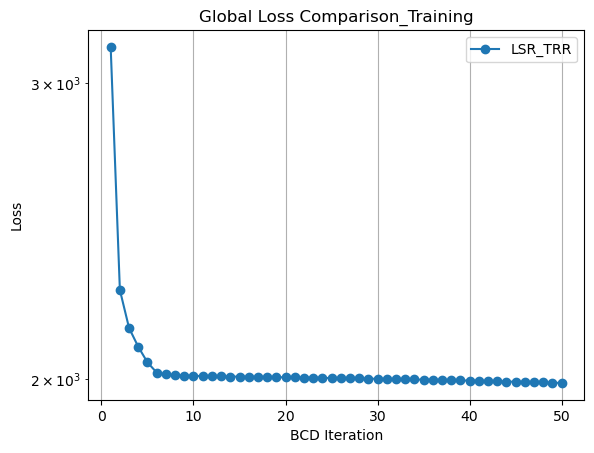

Final Objective Function Value CLOSED: [1988.2138861]


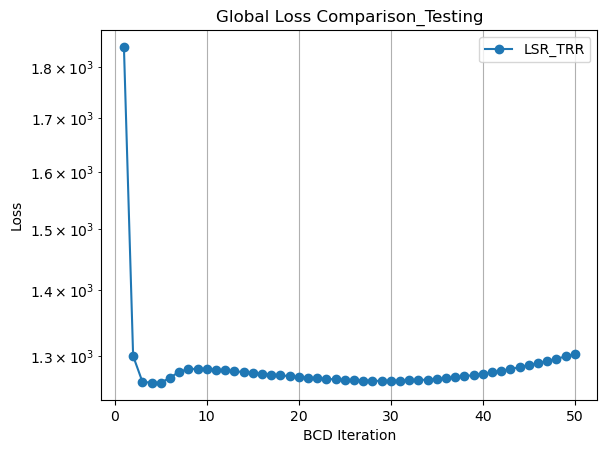

Final Objective Function Value CLOSED: 1303.1073636865458


In [33]:
# Training

training_objective_function_values = objective_function_values[:, 0, 2].reshape(-1, 1)

plt.figure()
# Plotting closed form solver
plt.plot(
    range(1, len(training_objective_function_values) + 1),
    training_objective_function_values,
    label="LSR_TRR",
    marker="o",
)

# Setting the title and labels
plt.title("Global Loss Comparison_Training")
plt.yscale("log")
plt.xlabel("BCD Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
# Adding a legend to distinguish the two plots
plt.legend()
# Display the plot
plt.show()

print("Final Objective Function Value CLOSED:", training_objective_function_values[-1])
 
#testing

def test_loss_at_train_iter(X_test,Y_test,best_lambda,factor_core_iteration,b=None):
    from optimization import objective_function_tensor_sep

    Y_test = Y_test - np.mean(Y_test)
    objective_function_test = []

    for i in range(len(factor_core_iteration)):
        lsr_ten = factor_core_iteration[i]
        expanded_lsr = lsr_ten.expand_to_tensor()
        objective_function_value = objective_function_tensor_sep(Y_test,X_test,expanded_lsr,lsr_ten,best_lambda,b = None)
        objective_function_test.append(objective_function_value)
    return objective_function_test

# plotting testing loss
test_objective_function_values = test_loss_at_train_iter(X_test,Y_test,lambda1,factor_core_iterates,b=None)

plt.figure()
# Plotting closed form solver
plt.plot(
    range(1, len(test_objective_function_values) + 1),
    test_objective_function_values,
    label="LSR_TRR",
    marker="o",
)

# Setting the title and labels
plt.title("Global Loss Comparison_Testing")
plt.yscale("log")
plt.xlabel("BCD Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
# Adding a legend to distinguish the two plots
plt.legend()
# Display the plot
plt.show()

print("Final Objective Function Value CLOSED:", test_objective_function_values[-1])




#### Gradient Plots

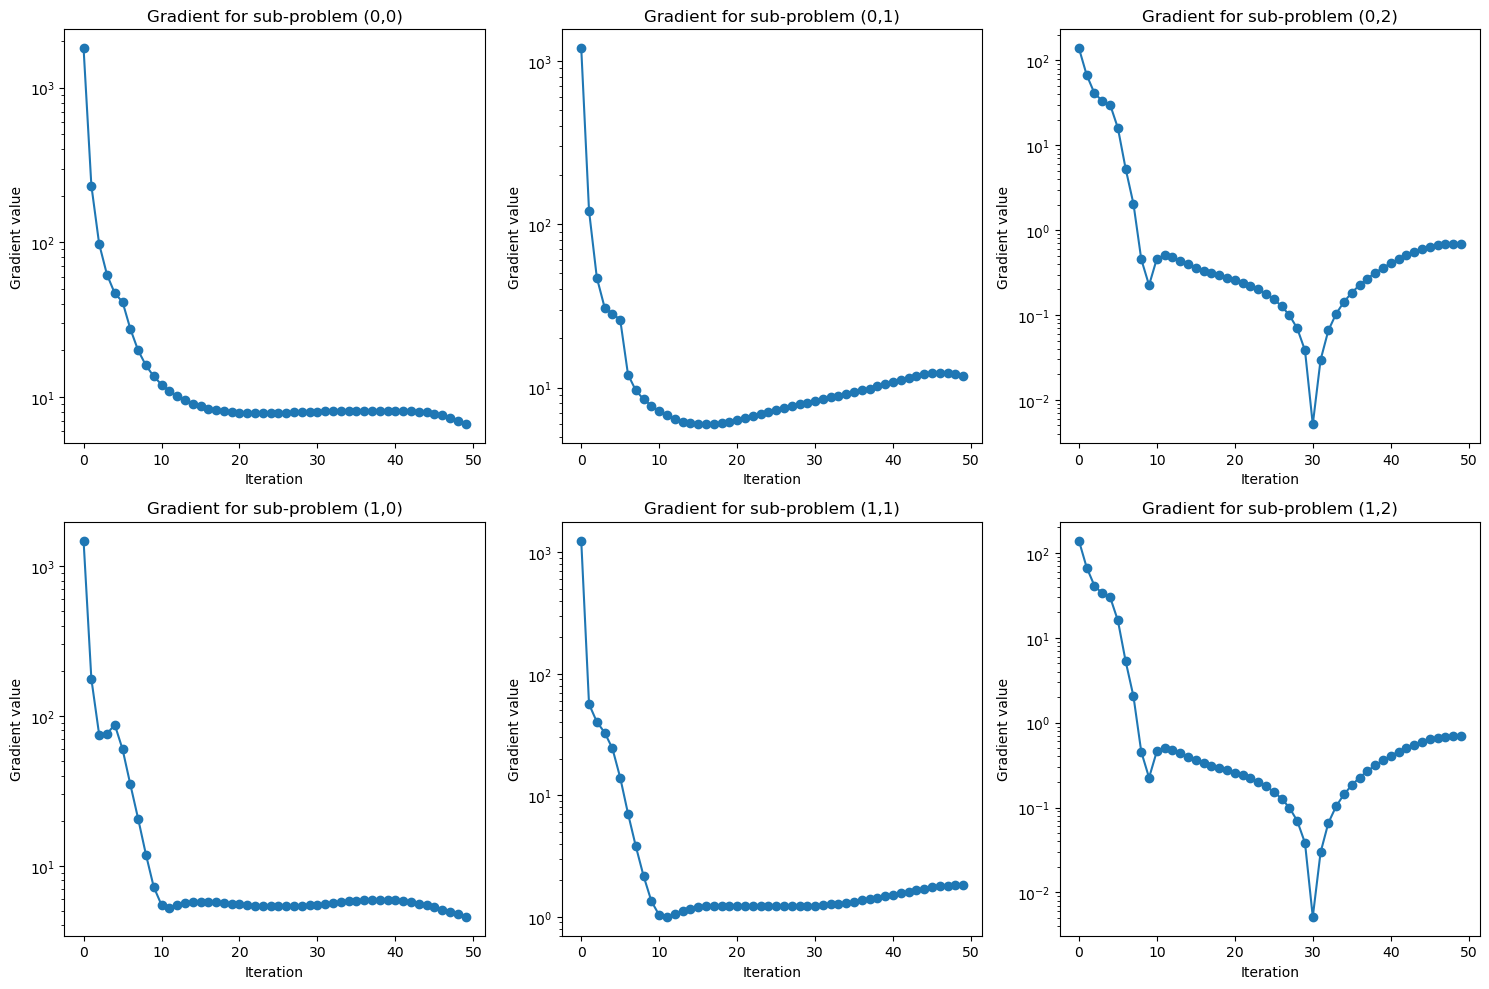

In [34]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Determine the number of rows and columns for subplots
num_rows = 2#len(iterate_level_values)
num_cols = 3#len(iterate_level_values[0]) if num_rows > 0 else 0

# Iterate over each subplot
for i in range(num_rows):
    for j in range(num_cols):
        axs[i, j].plot(gradient_values[:, i, j],marker = 'o') 
        axs[i, j].set_title(f'Gradient for sub-problem ({i},{j})')
        axs[i, j].set_xlabel('Iteration')
        axs[i, j].set_ylabel('Gradient value')
        axs[i,j].set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Iterate Difference 

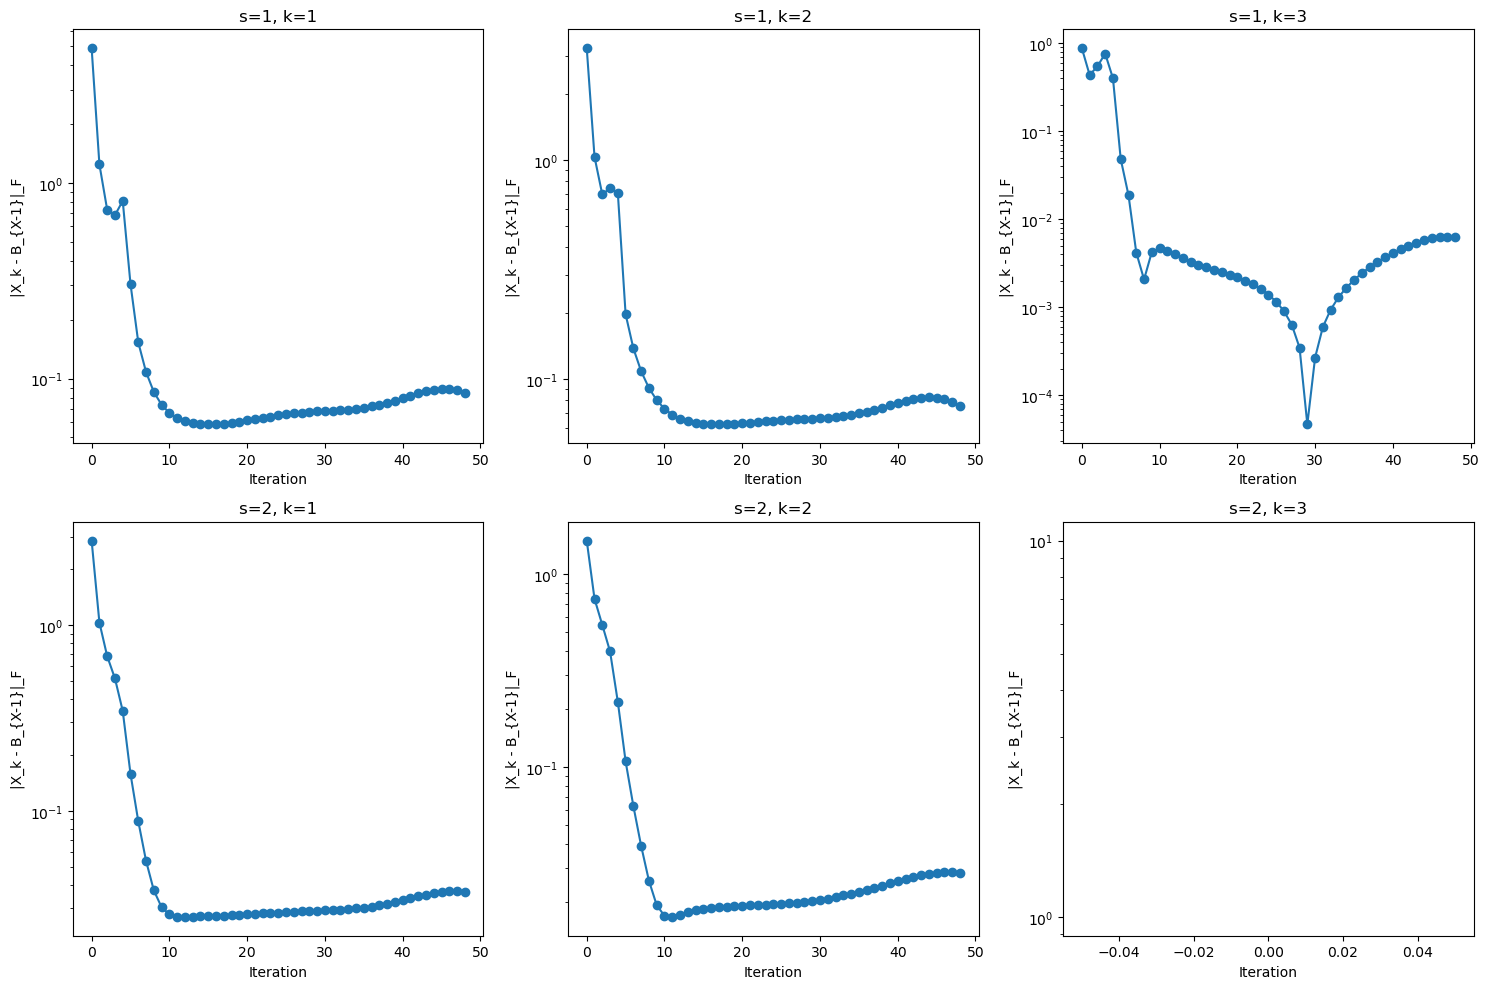

In [35]:
# factor matrix

def iterate_diff(iterate_level_values,s,k,max_iter):
    B = iterate_level_values[s][k]
    iter_diff = []
    for i in range(1,max_iter):
        diff = B[i] - B[i-1]
        norm_diff = np.linalg.norm(diff,'fro')
        iter_diff.append(norm_diff)
    return iter_diff

import numpy as np

all_diff_sep = []
for s in range(len(iterate_level_values)):
    all_diff_fac = []
    for k in range(len(iterate_level_values[s])):
        if len(iterate_level_values[s][k][0]) == 0:  # Check if the array is empty
            difference = []
            all_diff_fac.append(difference)
        else:
            difference = iterate_diff(iterate_level_values, s, k, len(factor_core_iterates)) 
            all_diff_fac.append(difference)
    all_diff_sep.append(all_diff_fac)

# Determine the number of rows and columns for subplots
num_rows = len(all_diff_sep)
num_cols = len(all_diff_sep[0]) if num_rows > 0 else 0


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate through all_diff_sep to plot the differences
for s in range(num_rows):
    for k in range(num_cols):
        ax = axes[s, k] if num_rows > 1 else axes[k]
        ax.plot(all_diff_sep[s][k],marker = 'o')
        ax.set_title(f's={s+1}, k={k+1}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('|X_k - B_{X-1}|_F')
        ax.set_yscale('log')

# Adjust layout for better readability
plt.tight_layout()
plt.show()




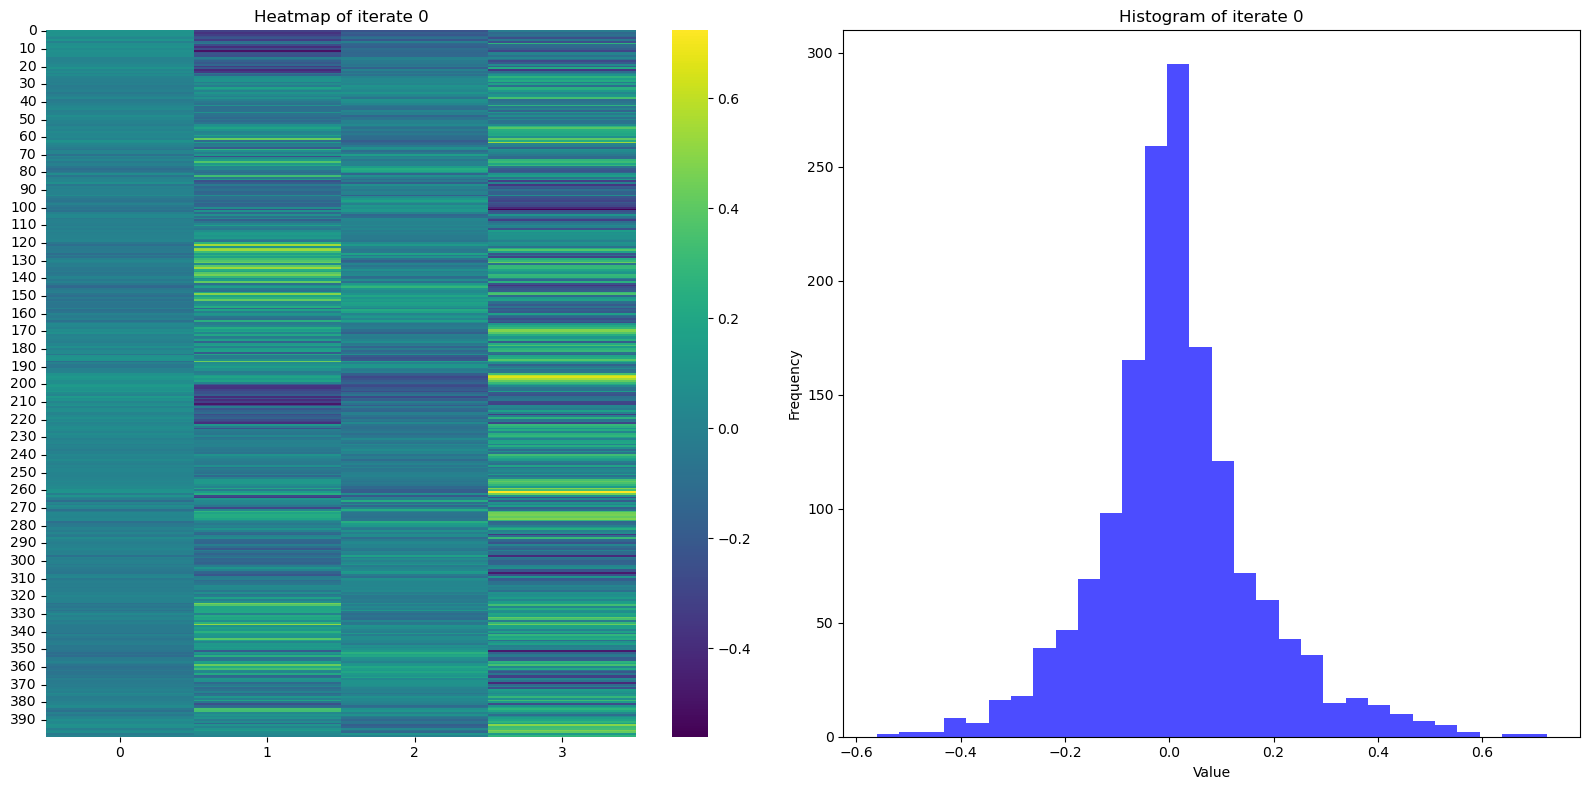

Energy of iterate 0: 6.109524240533115


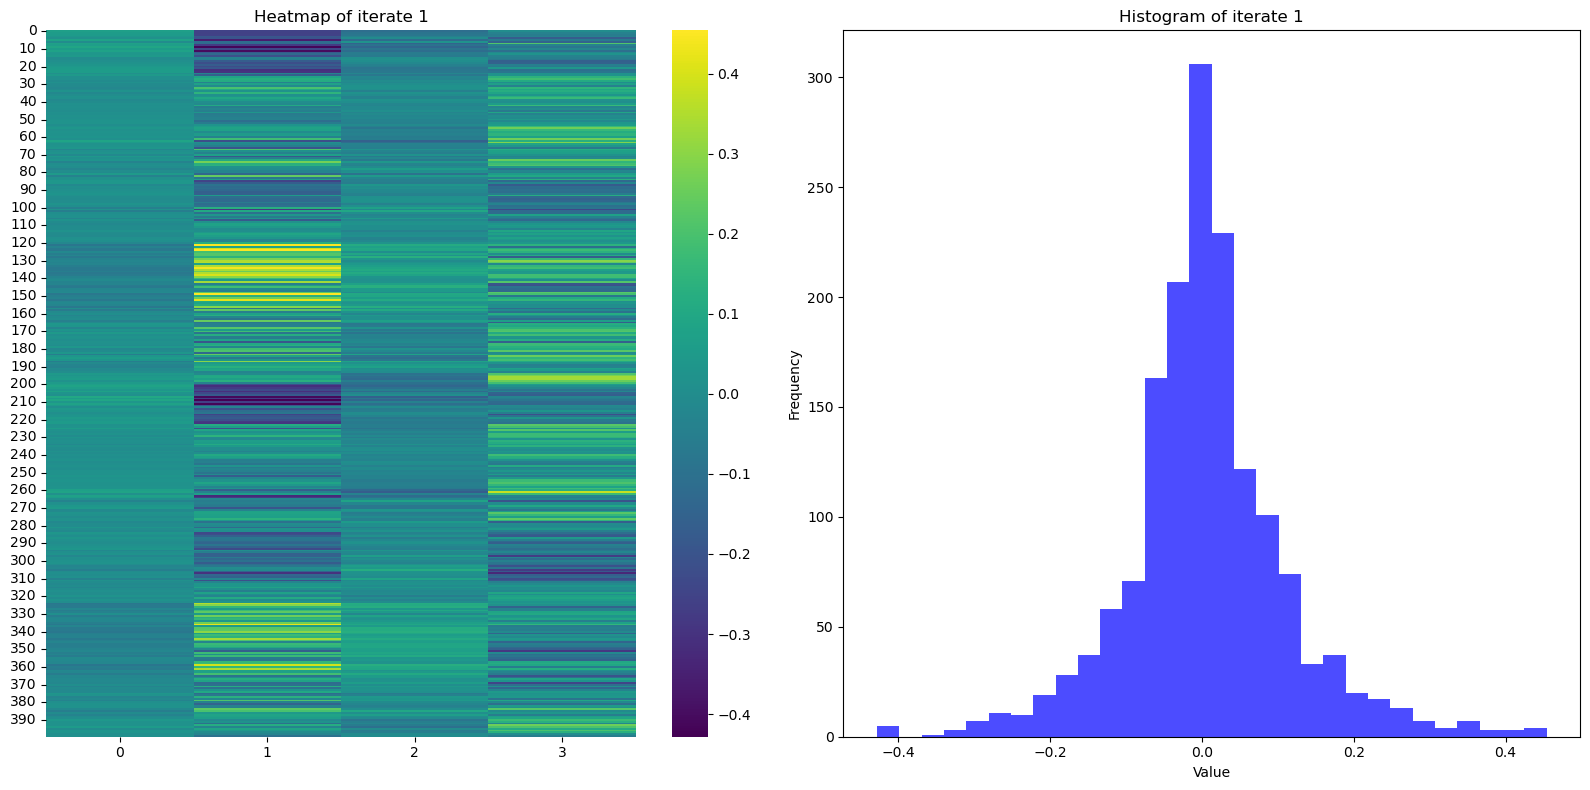

Energy of iterate 1: 4.283092849628686


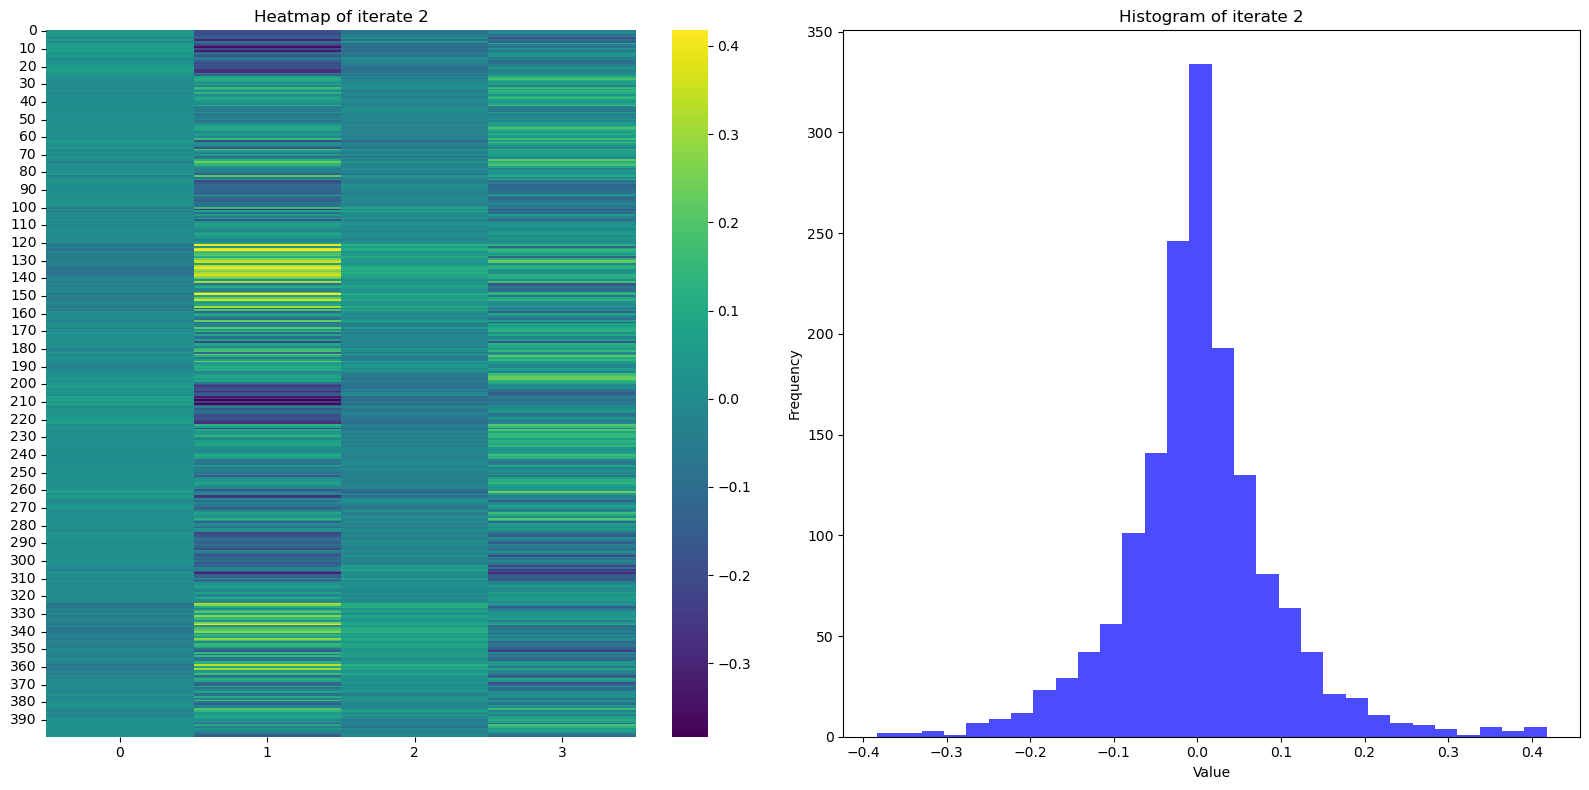

Energy of iterate 2: 3.7297924893678367


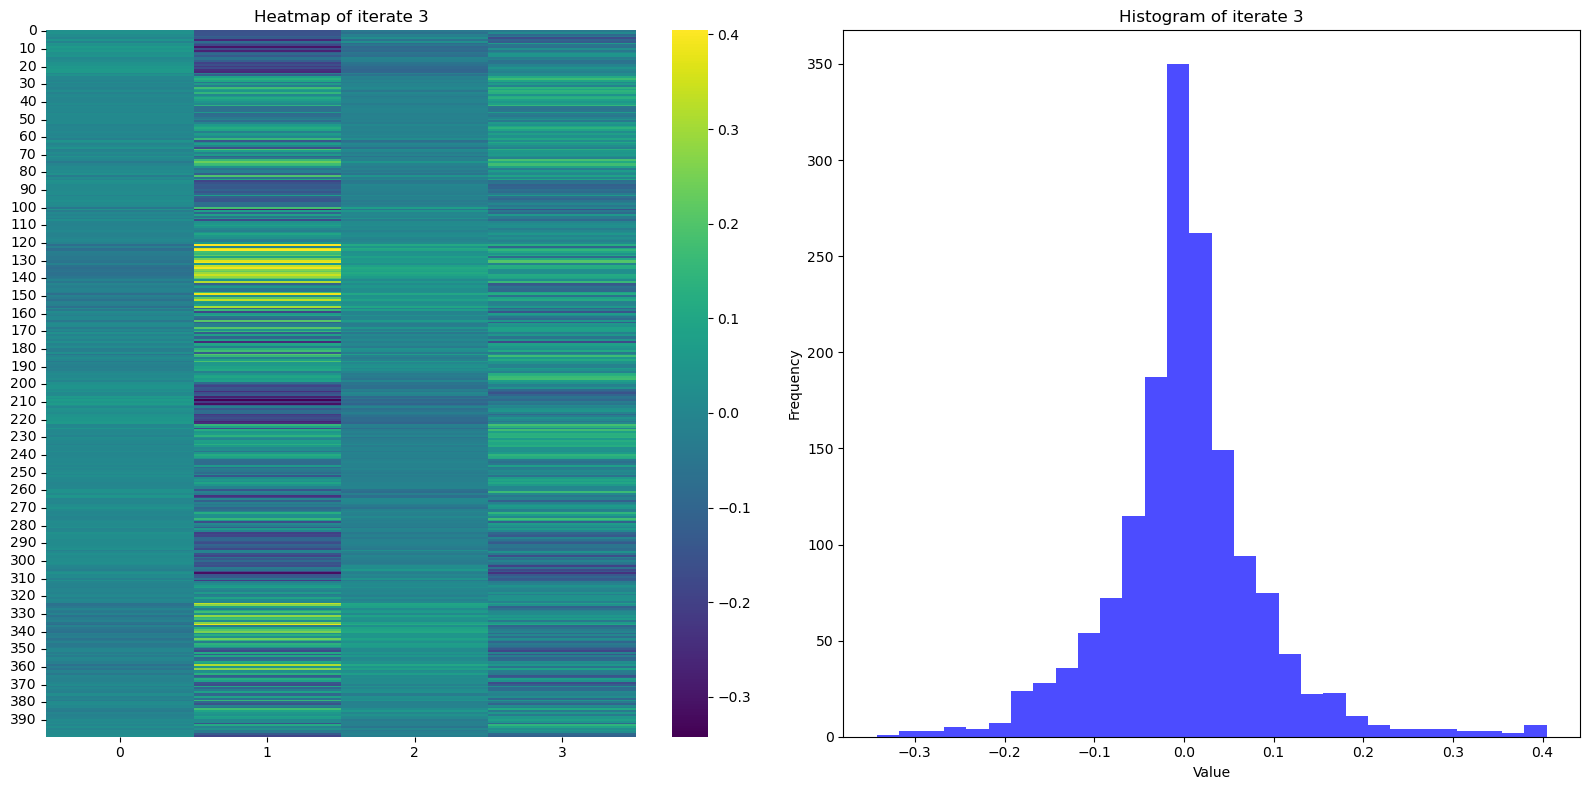

Energy of iterate 3: 3.415409561901059


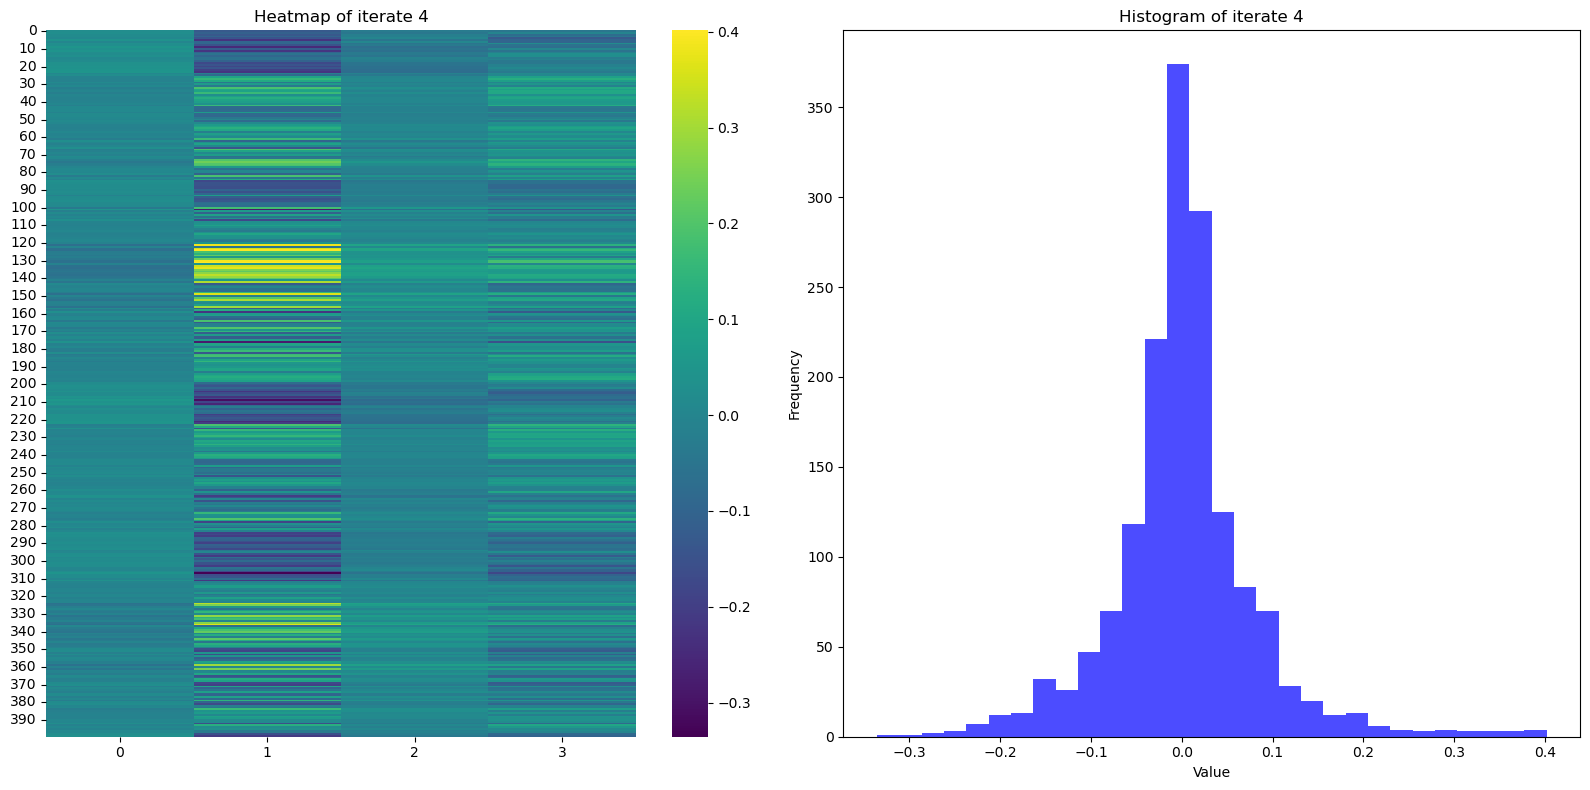

Energy of iterate 4: 3.1763080449736396


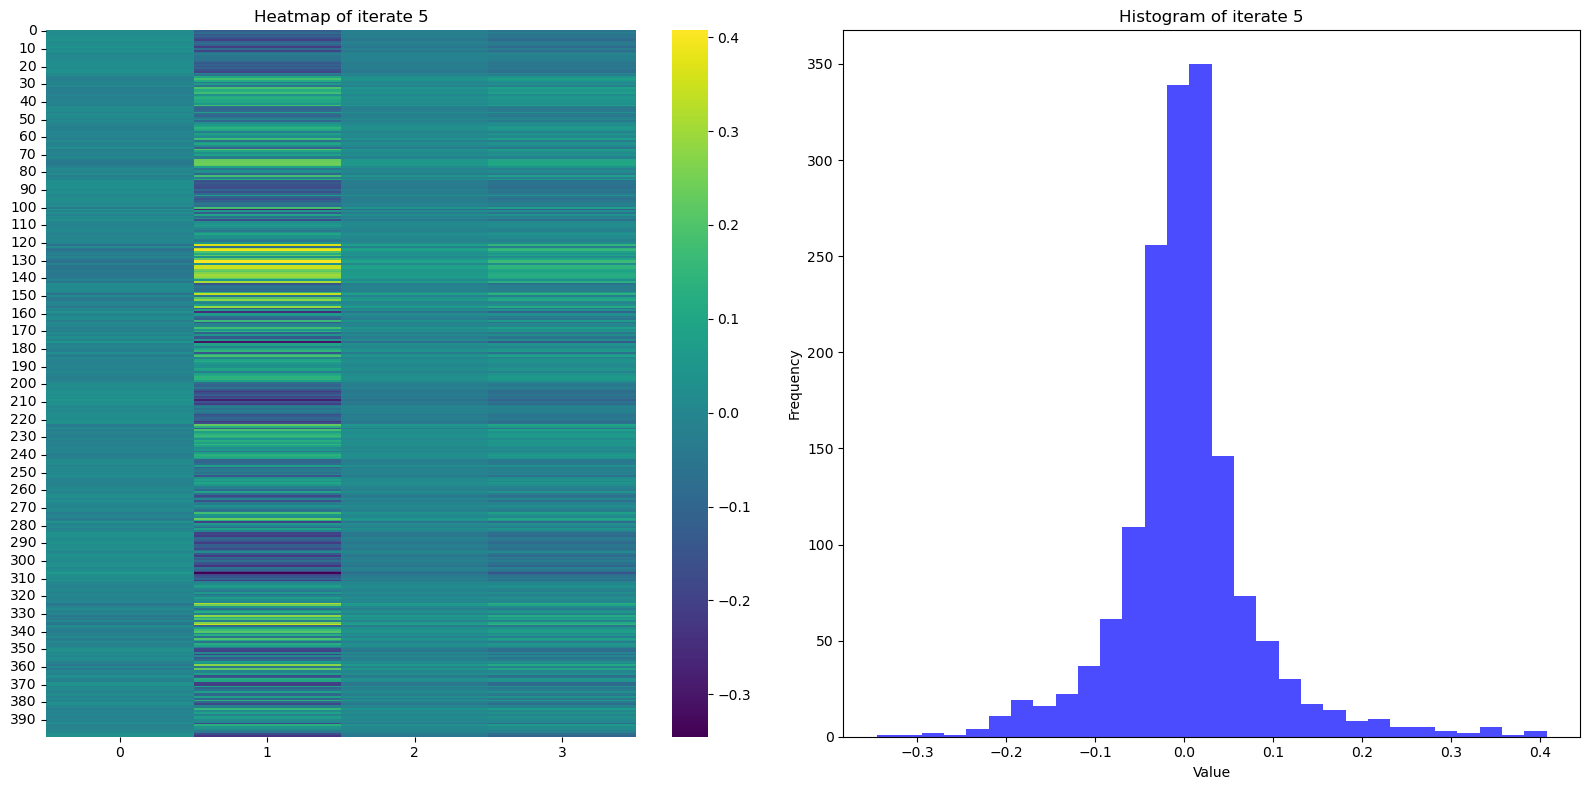

Energy of iterate 5: 3.058063571917057


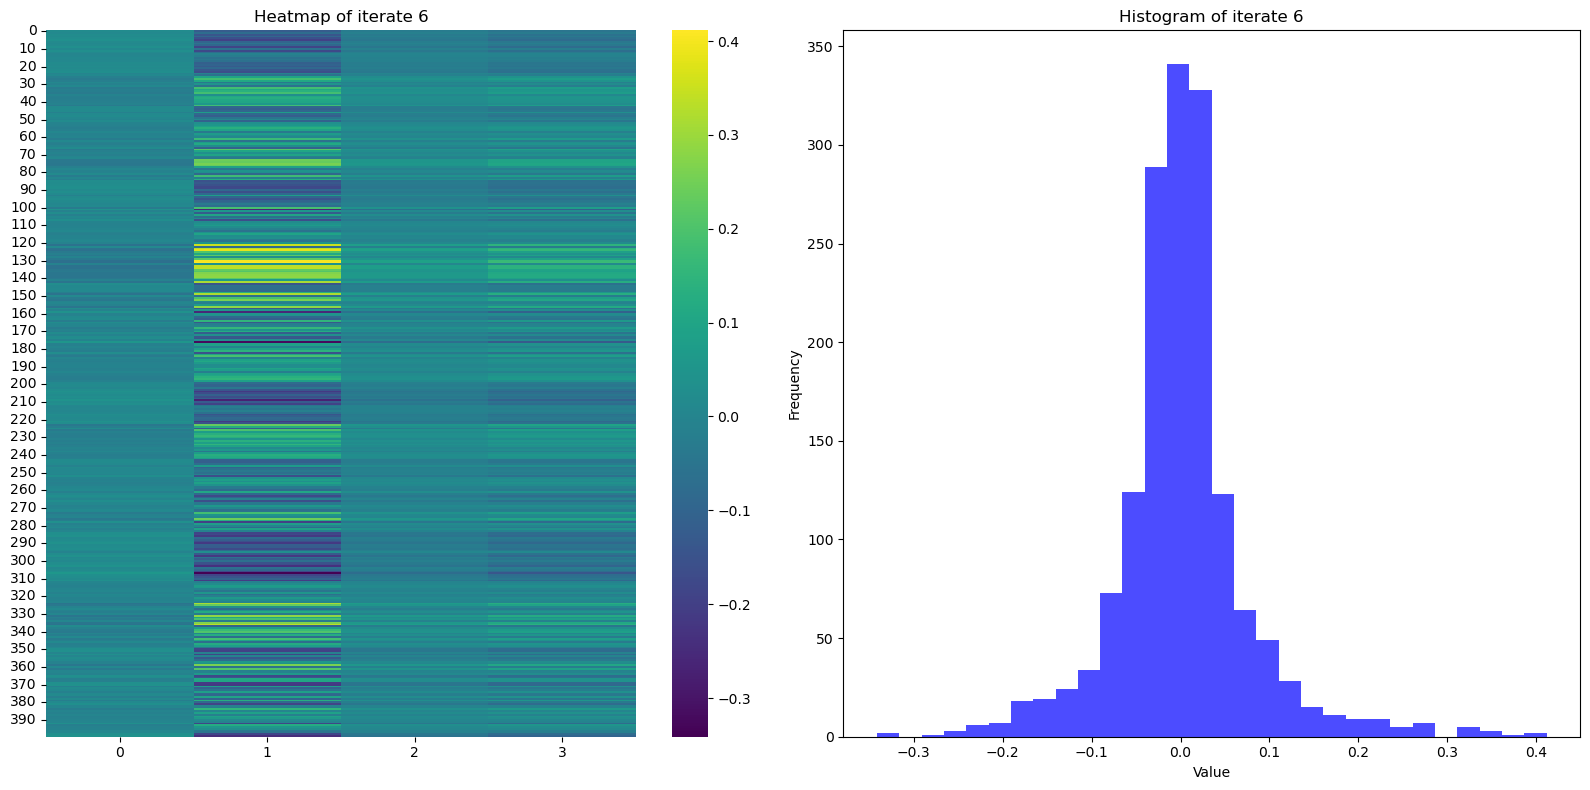

Energy of iterate 6: 3.0235621145475022


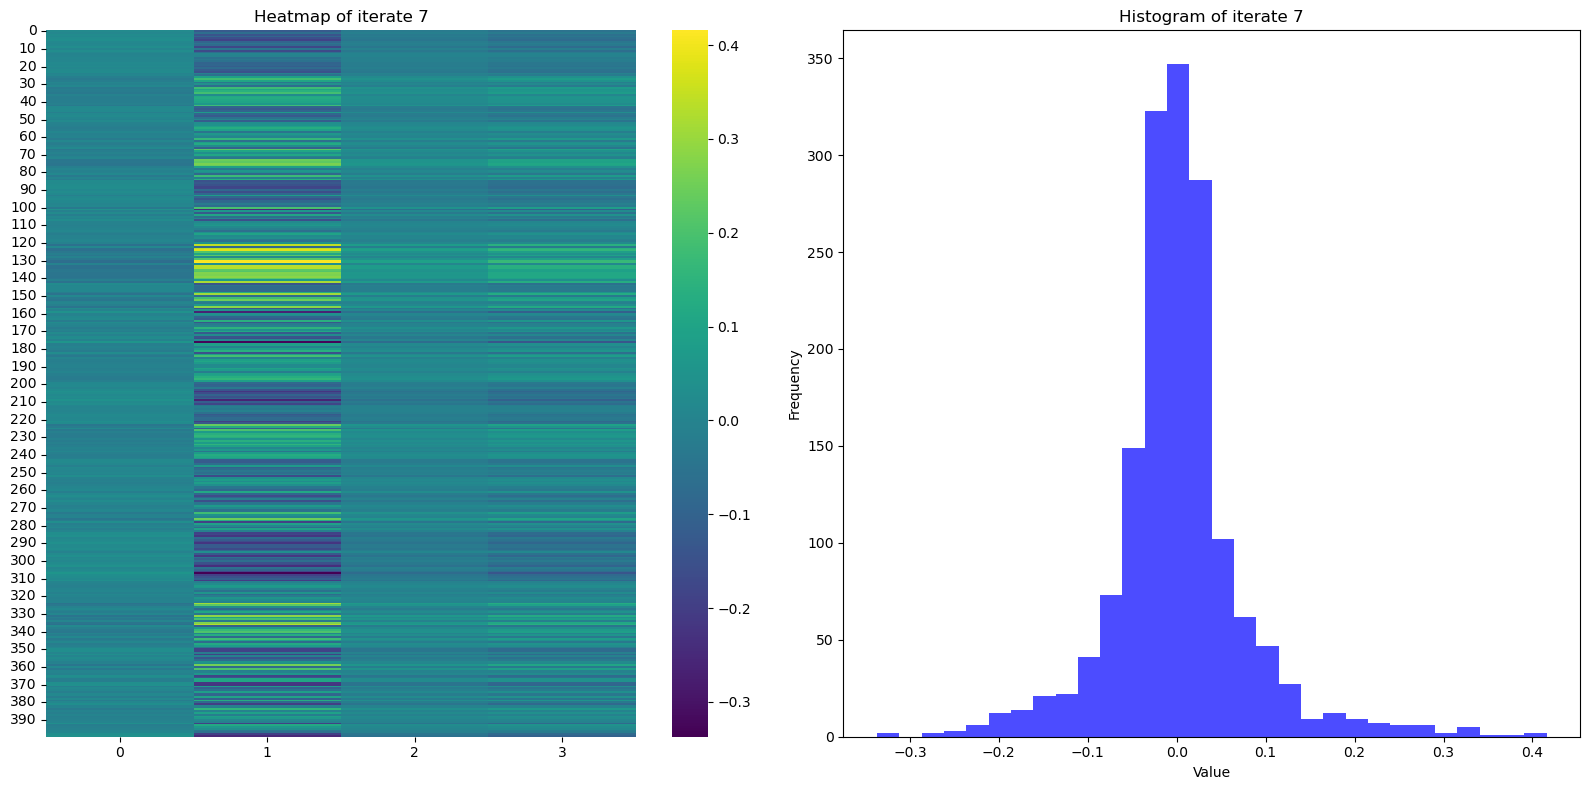

Energy of iterate 7: 3.00345545503987


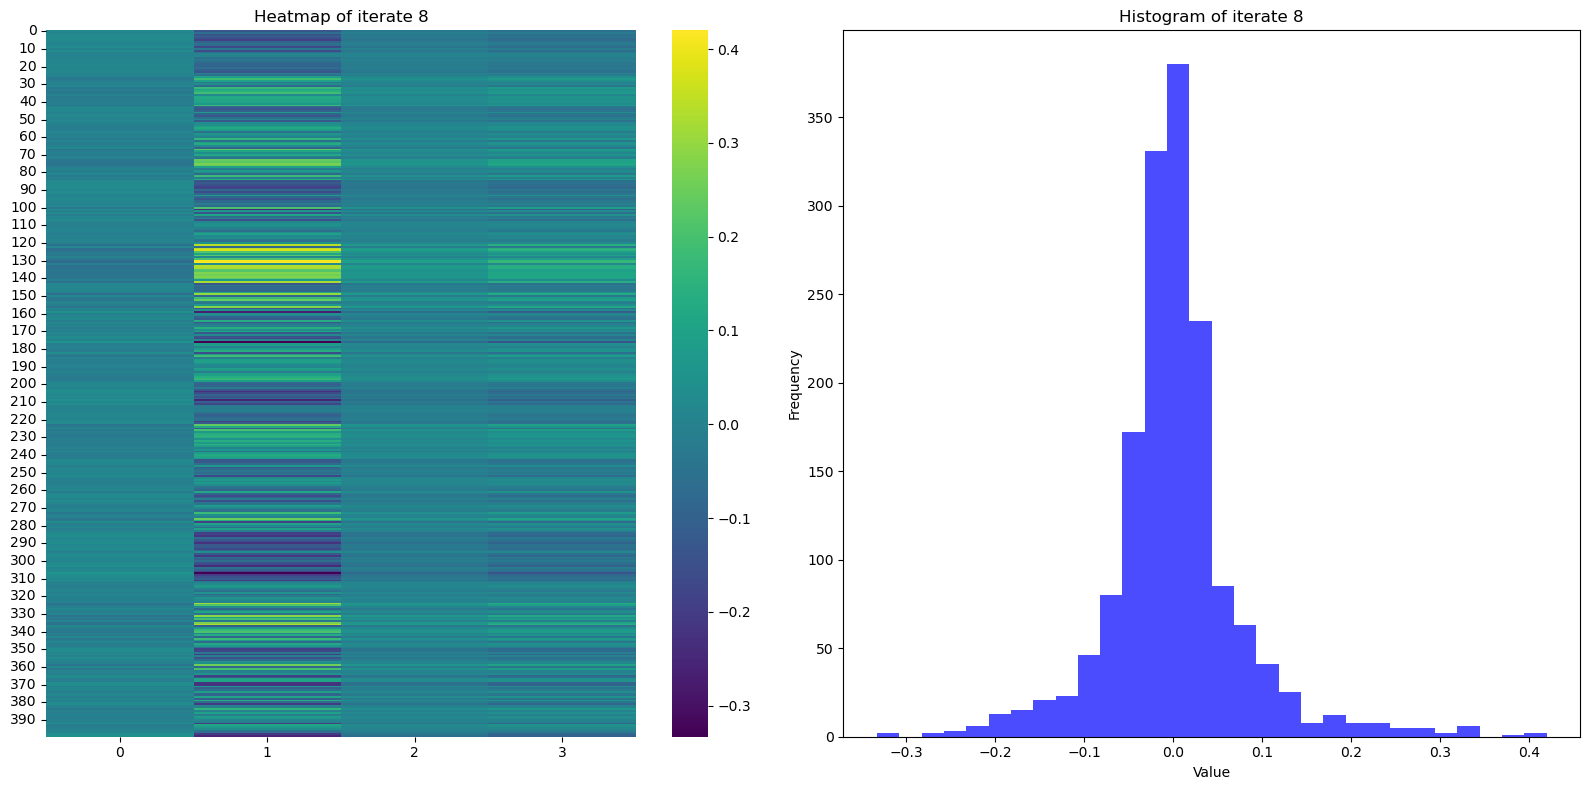

Energy of iterate 8: 2.989641914725545


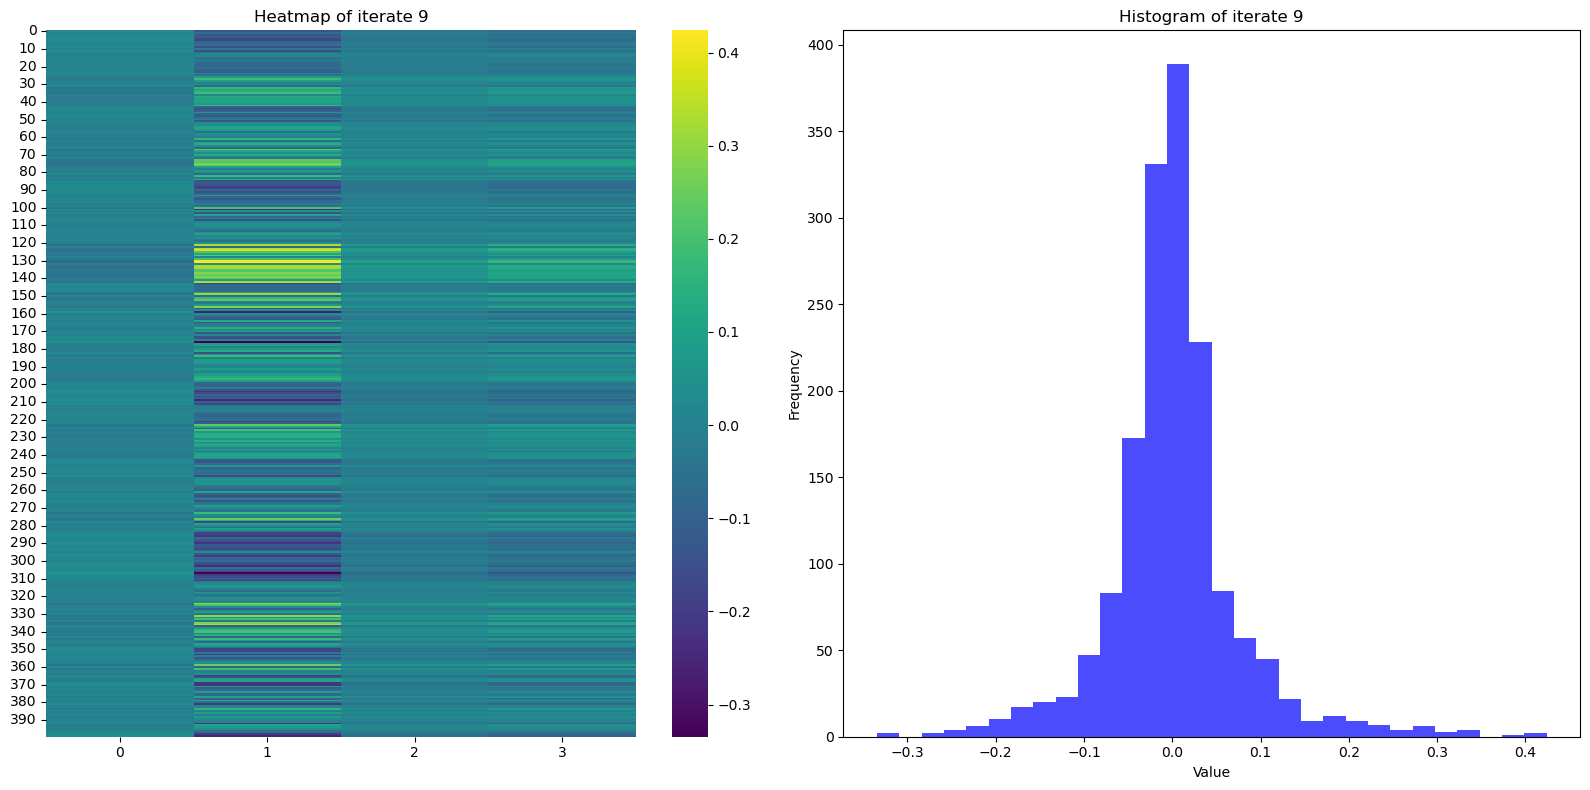

Energy of iterate 9: 2.9782034390045258


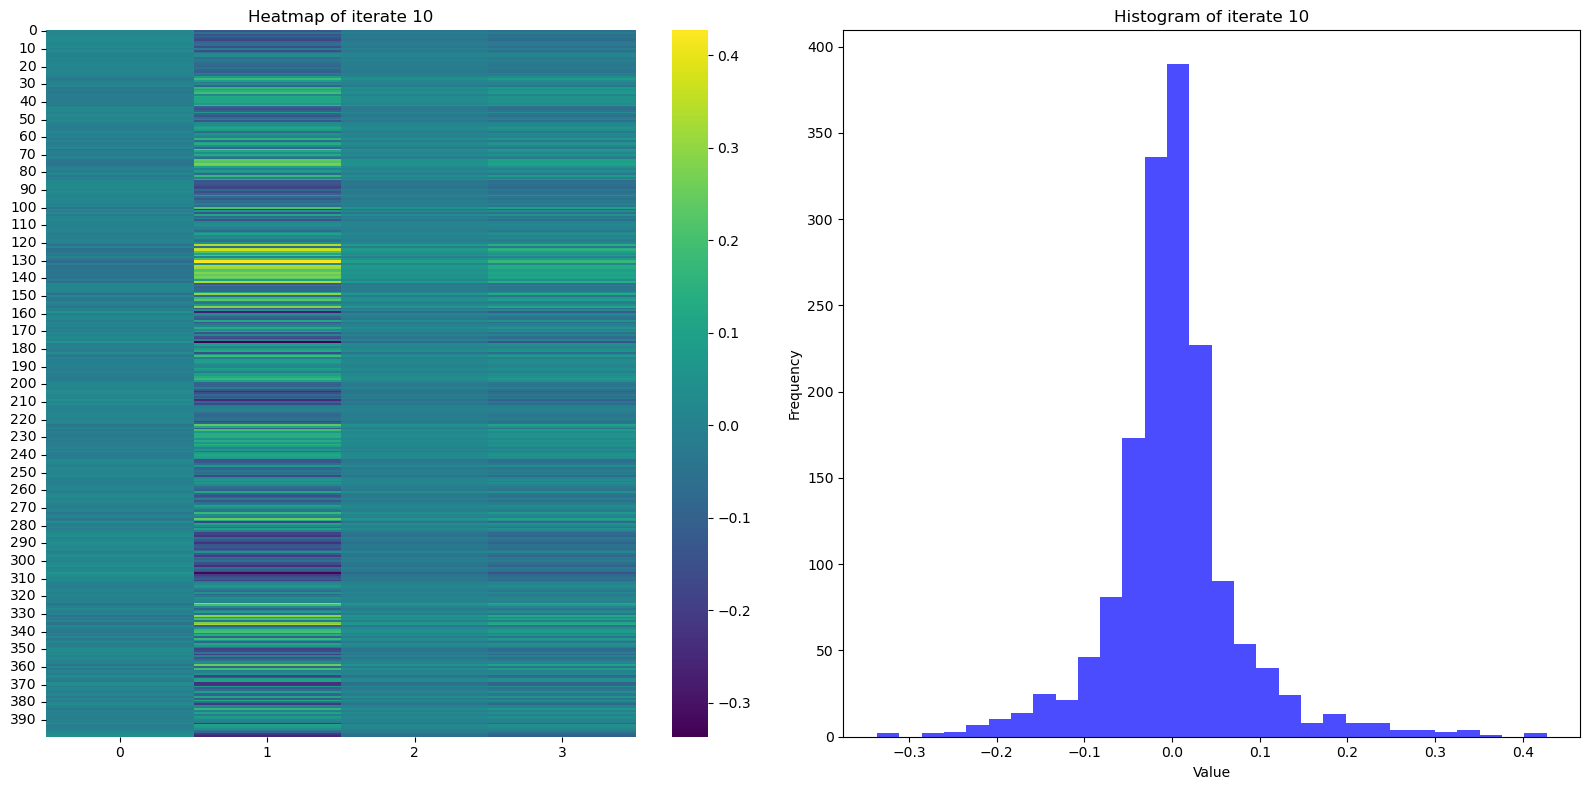

Energy of iterate 10: 2.9675338440043326


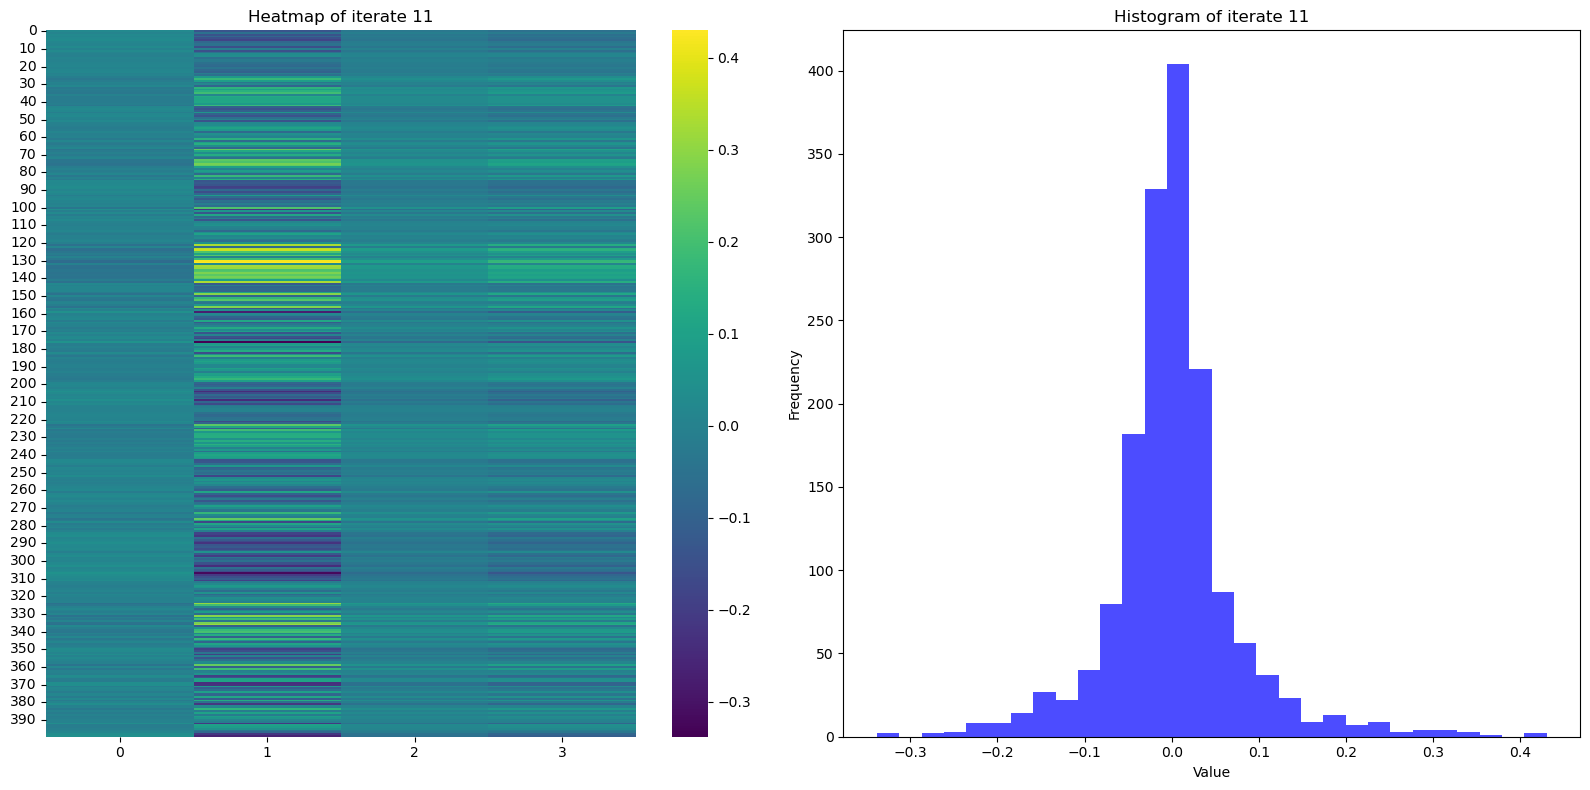

Energy of iterate 11: 2.9570923947295764


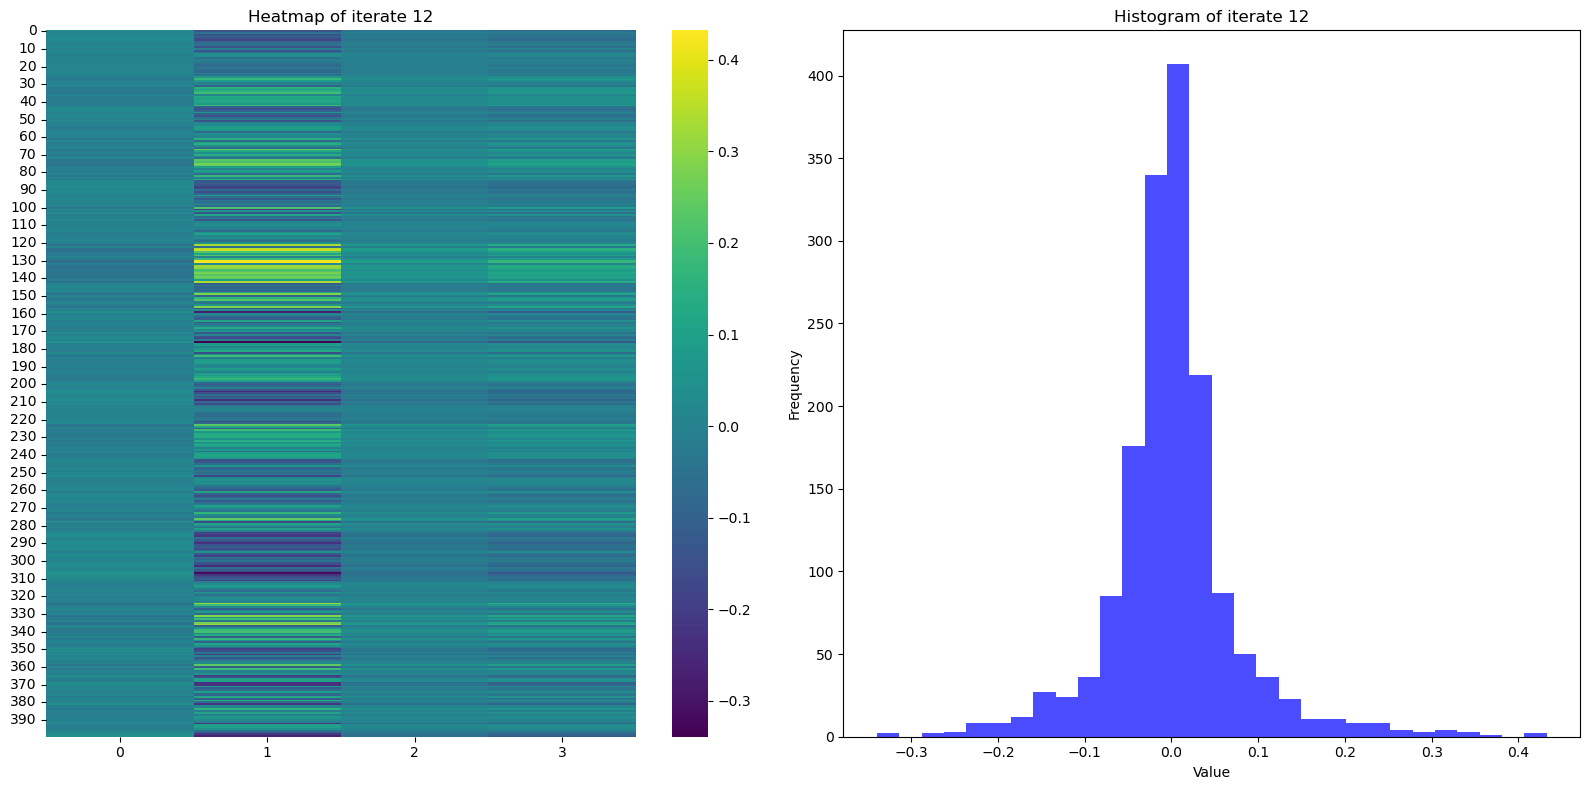

Energy of iterate 12: 2.946761616542849


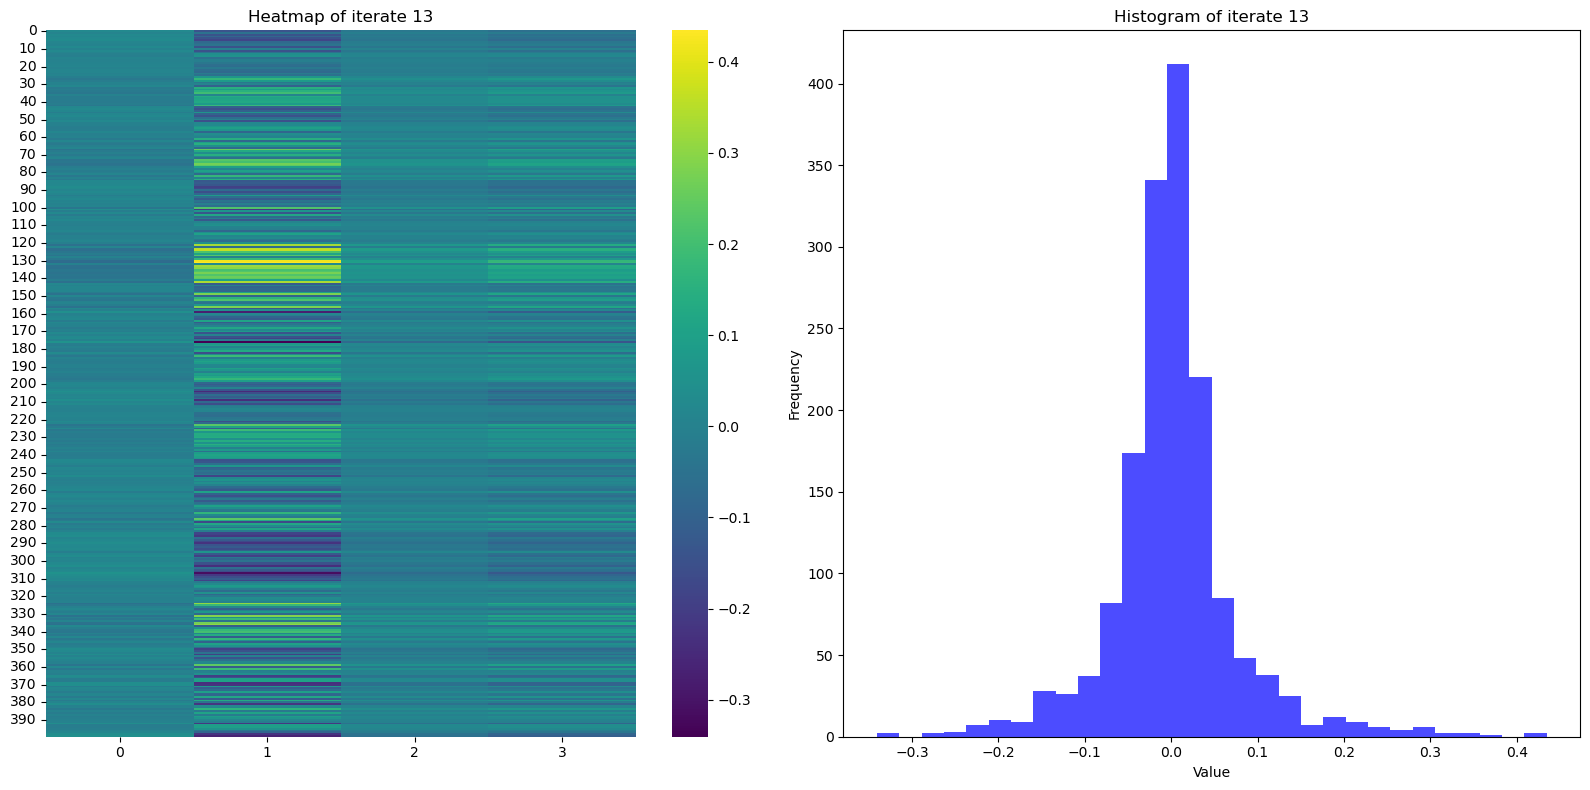

Energy of iterate 13: 2.936568330521481


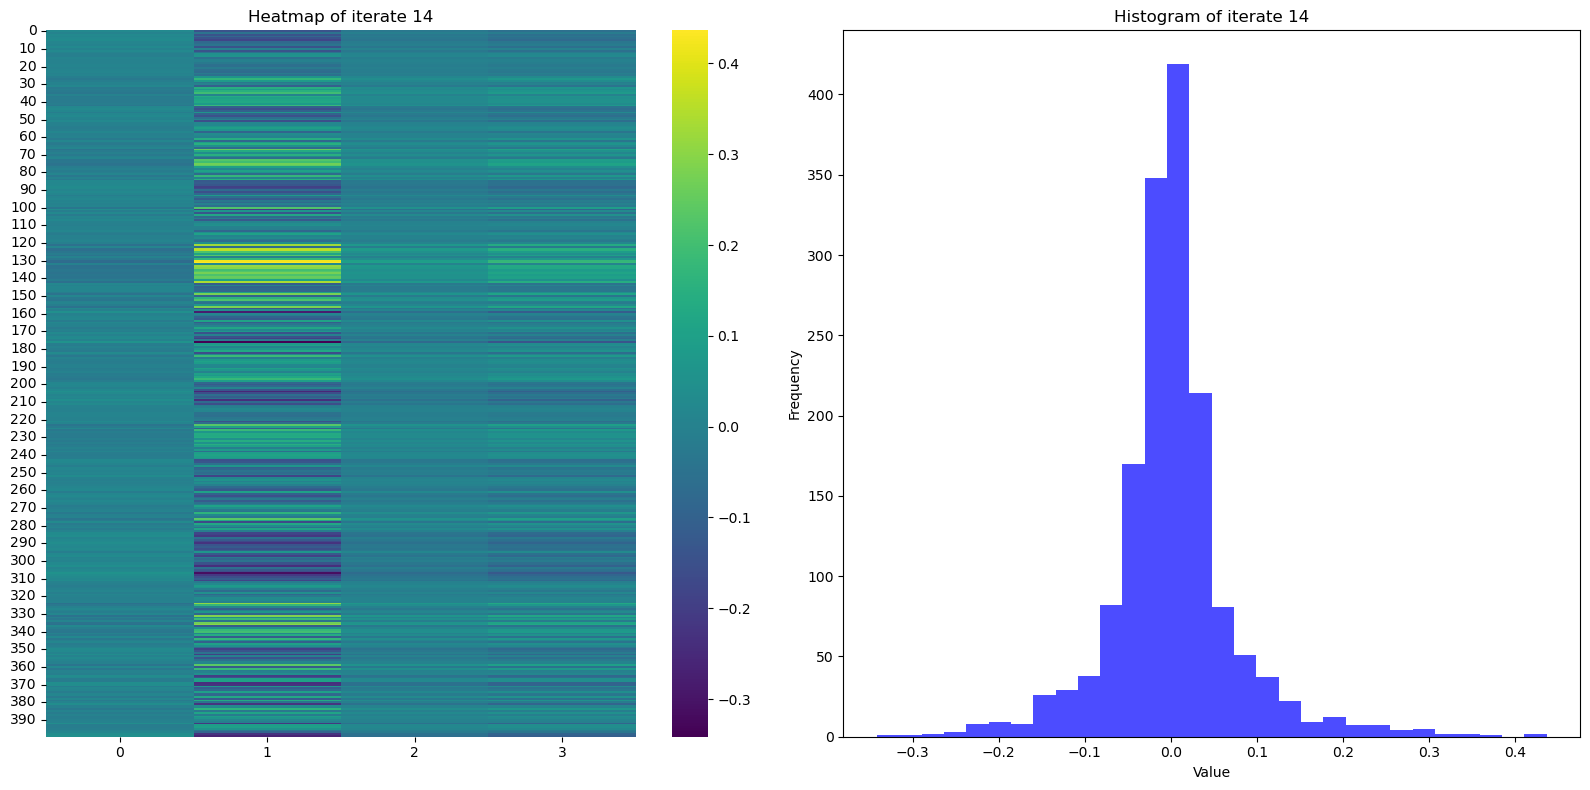

Energy of iterate 14: 2.926575185054618


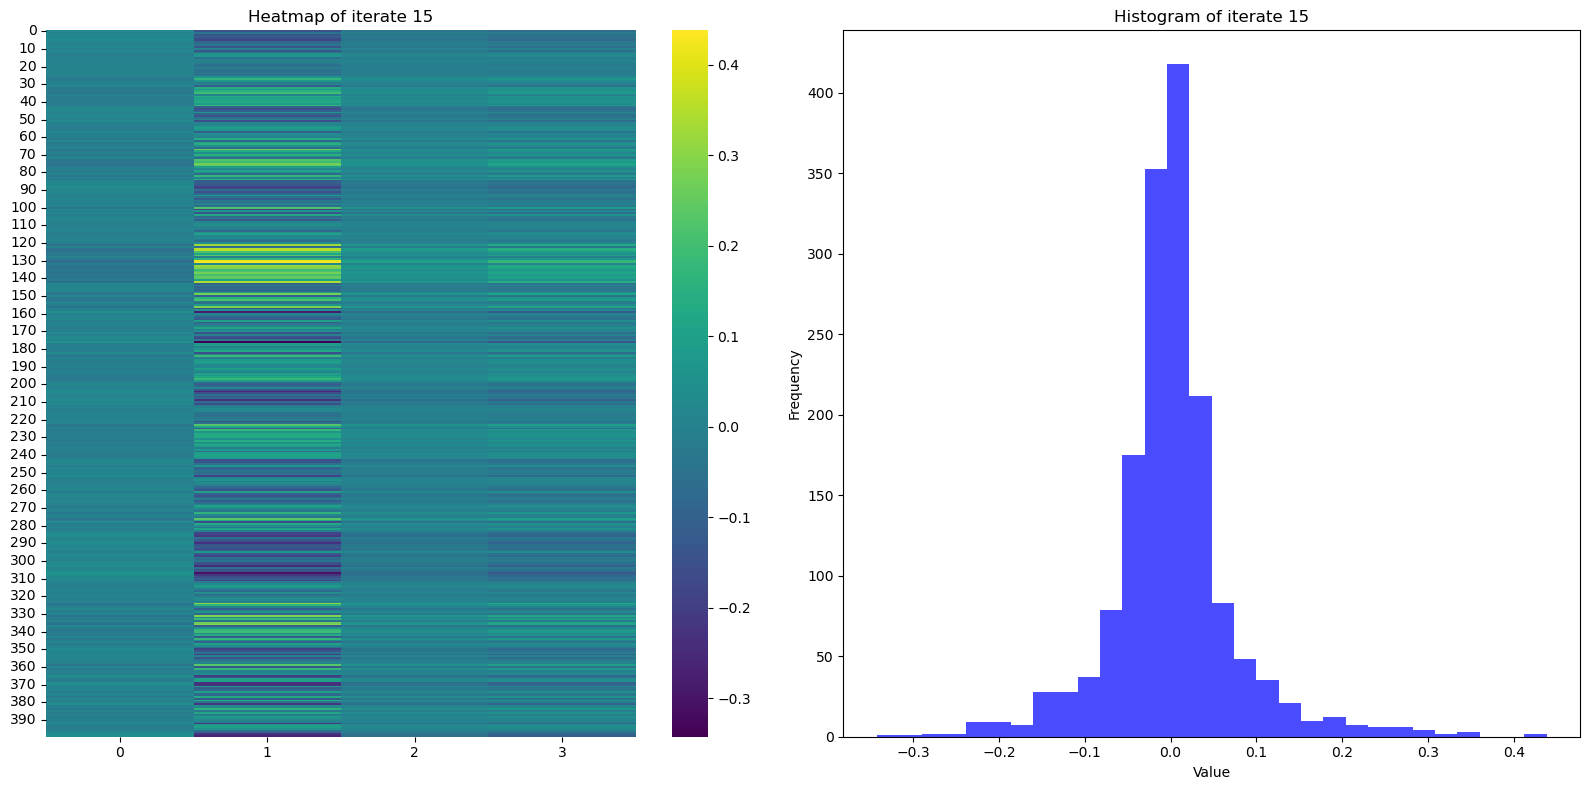

Energy of iterate 15: 2.91684348243644


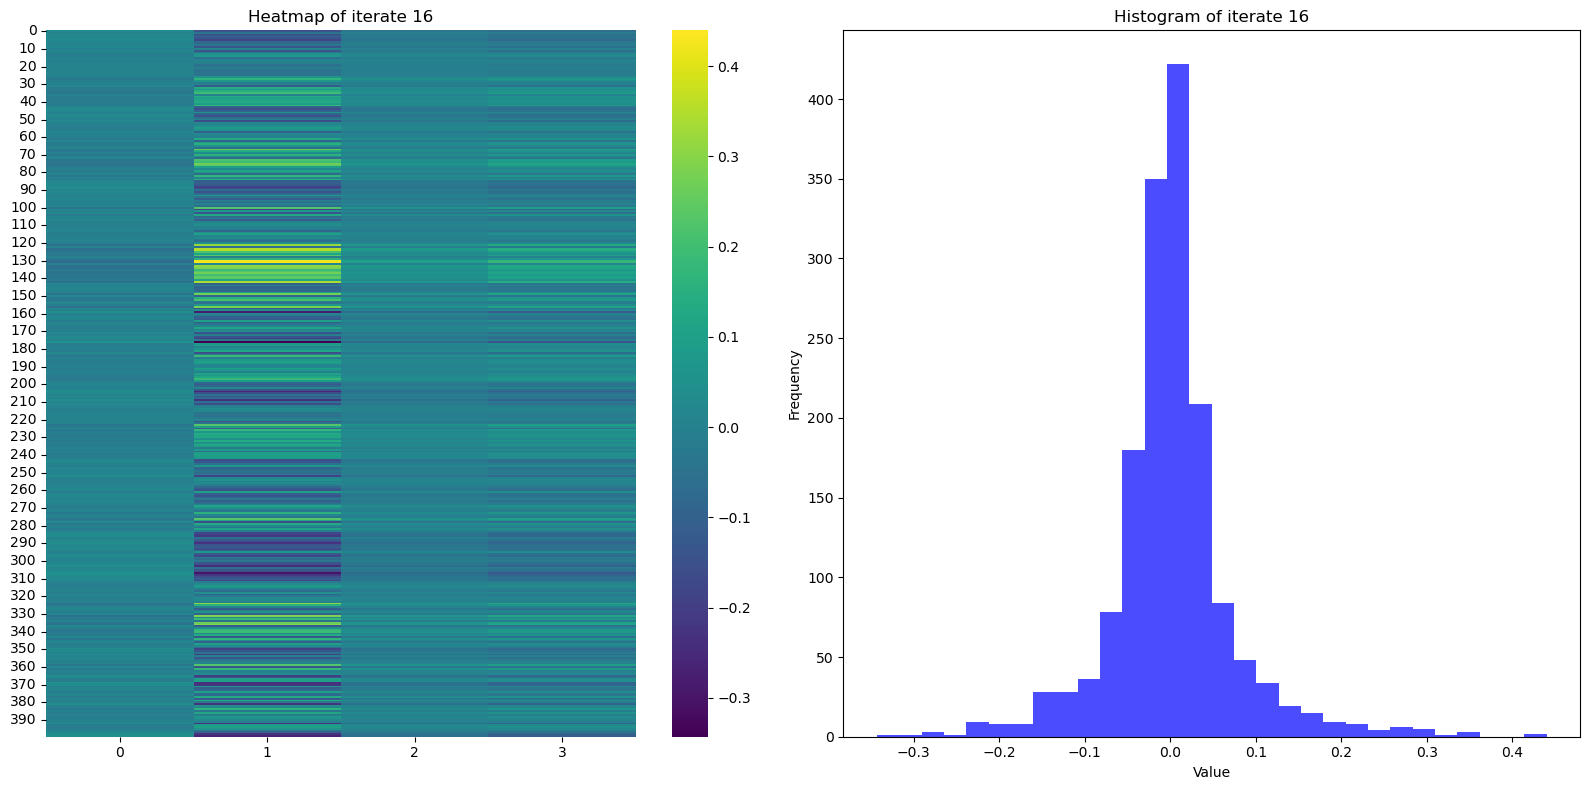

Energy of iterate 16: 2.9074238008393585


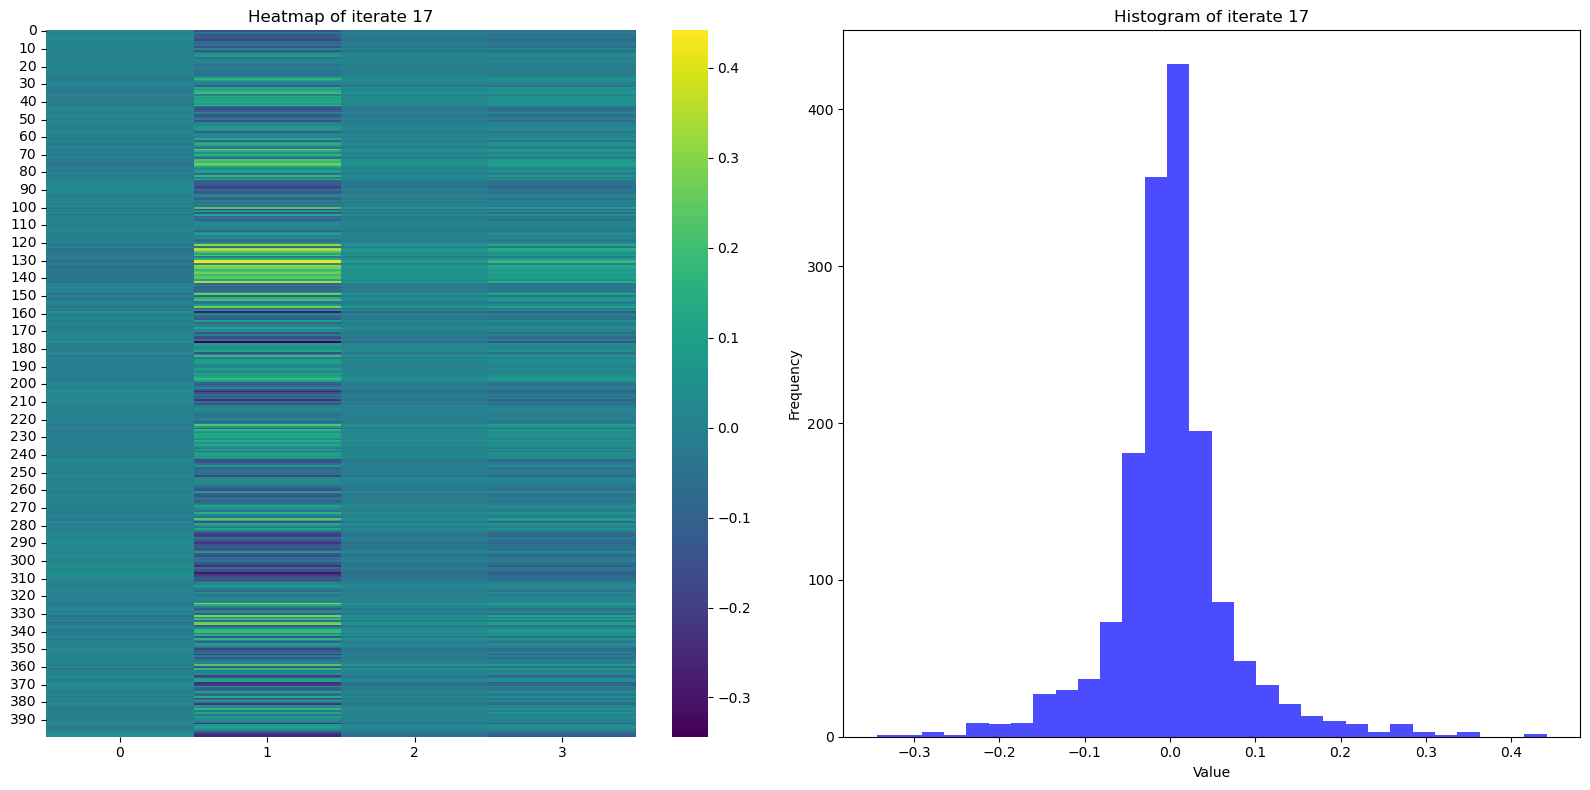

Energy of iterate 17: 2.898356567536656


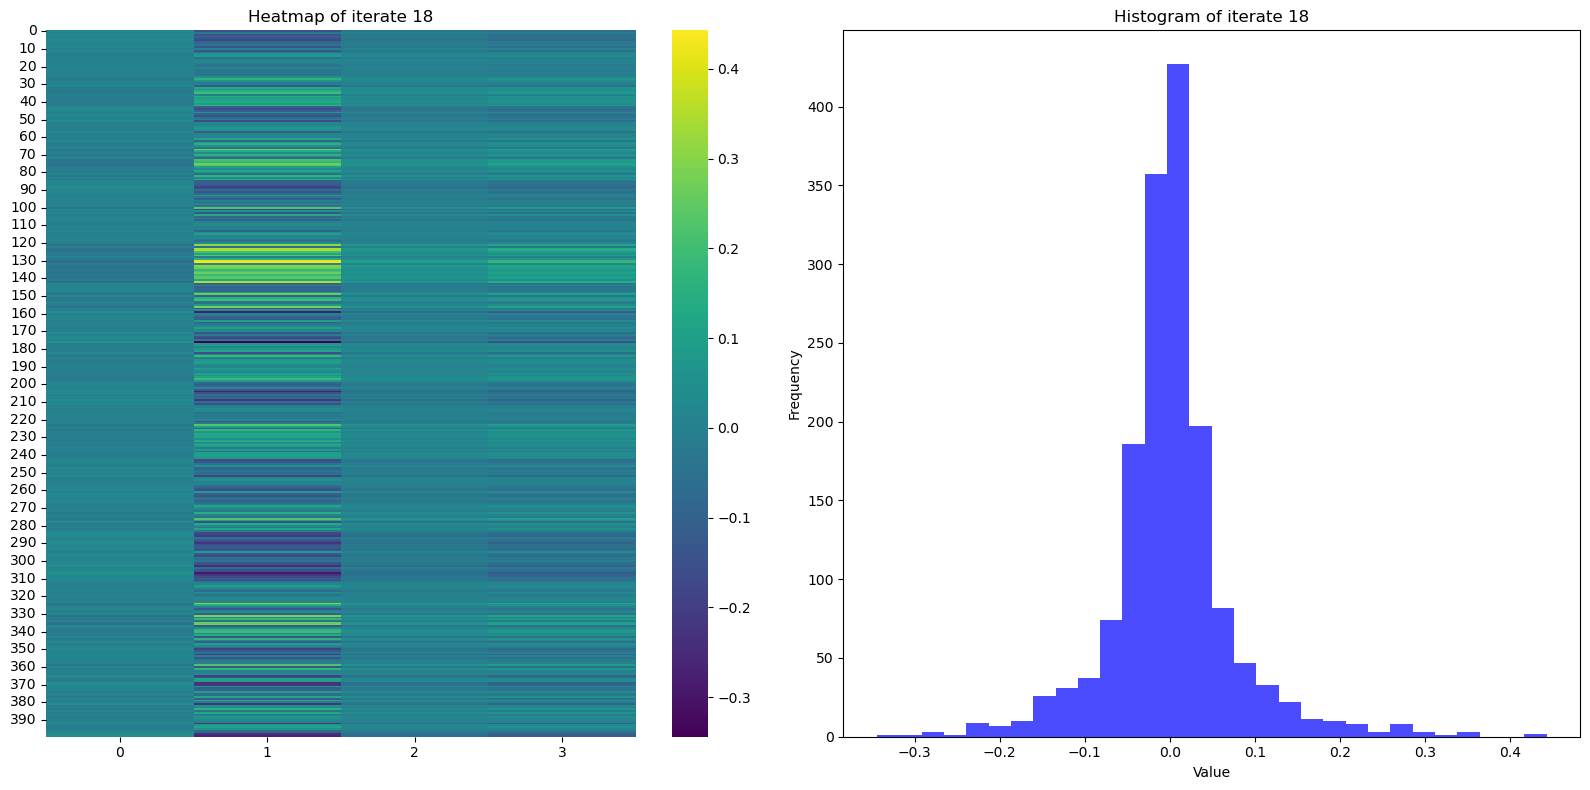

Energy of iterate 18: 2.88967547255322


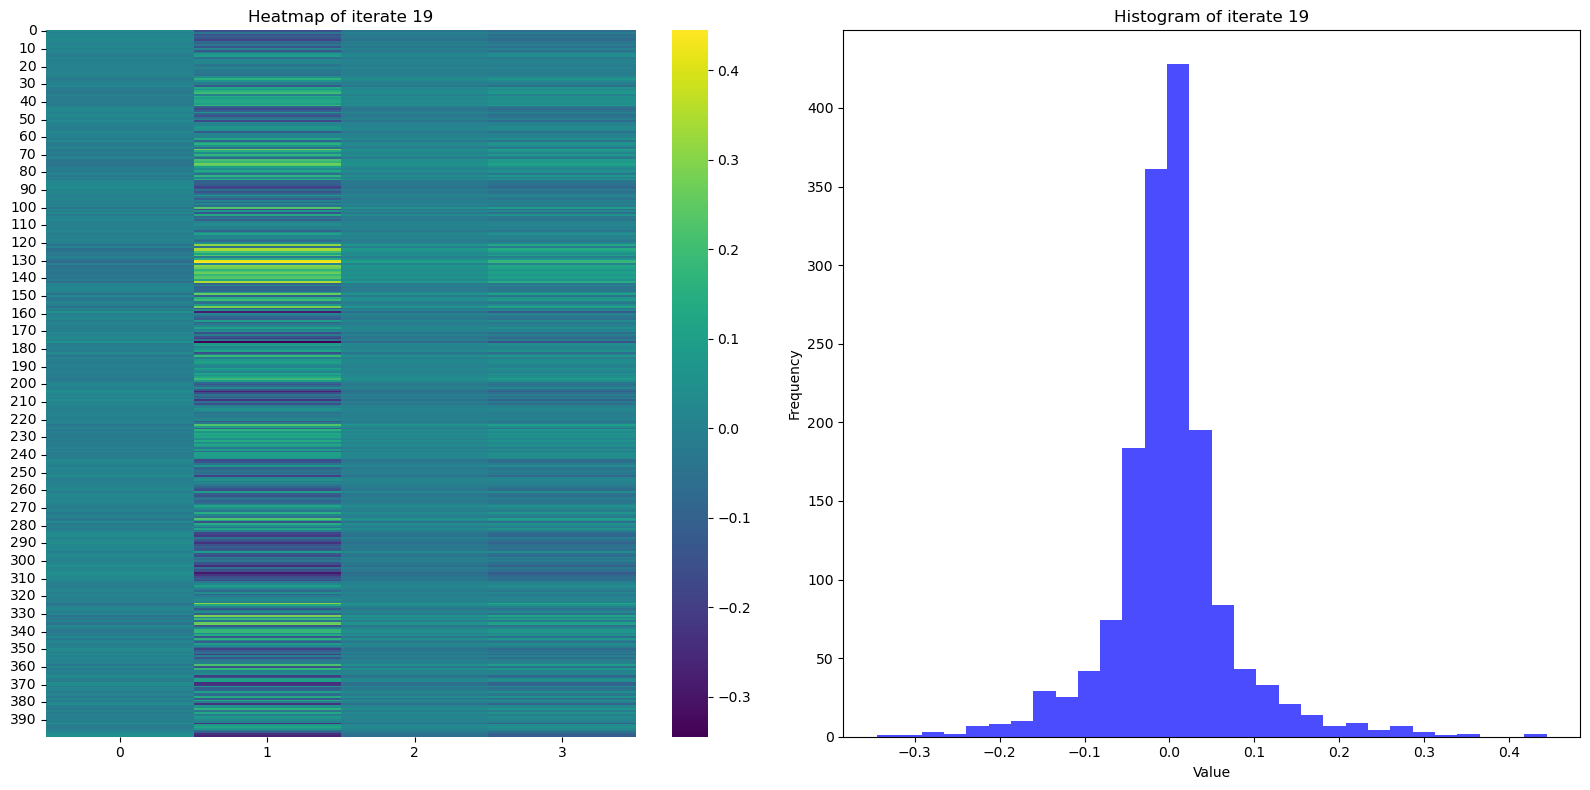

Energy of iterate 19: 2.8814110057574824


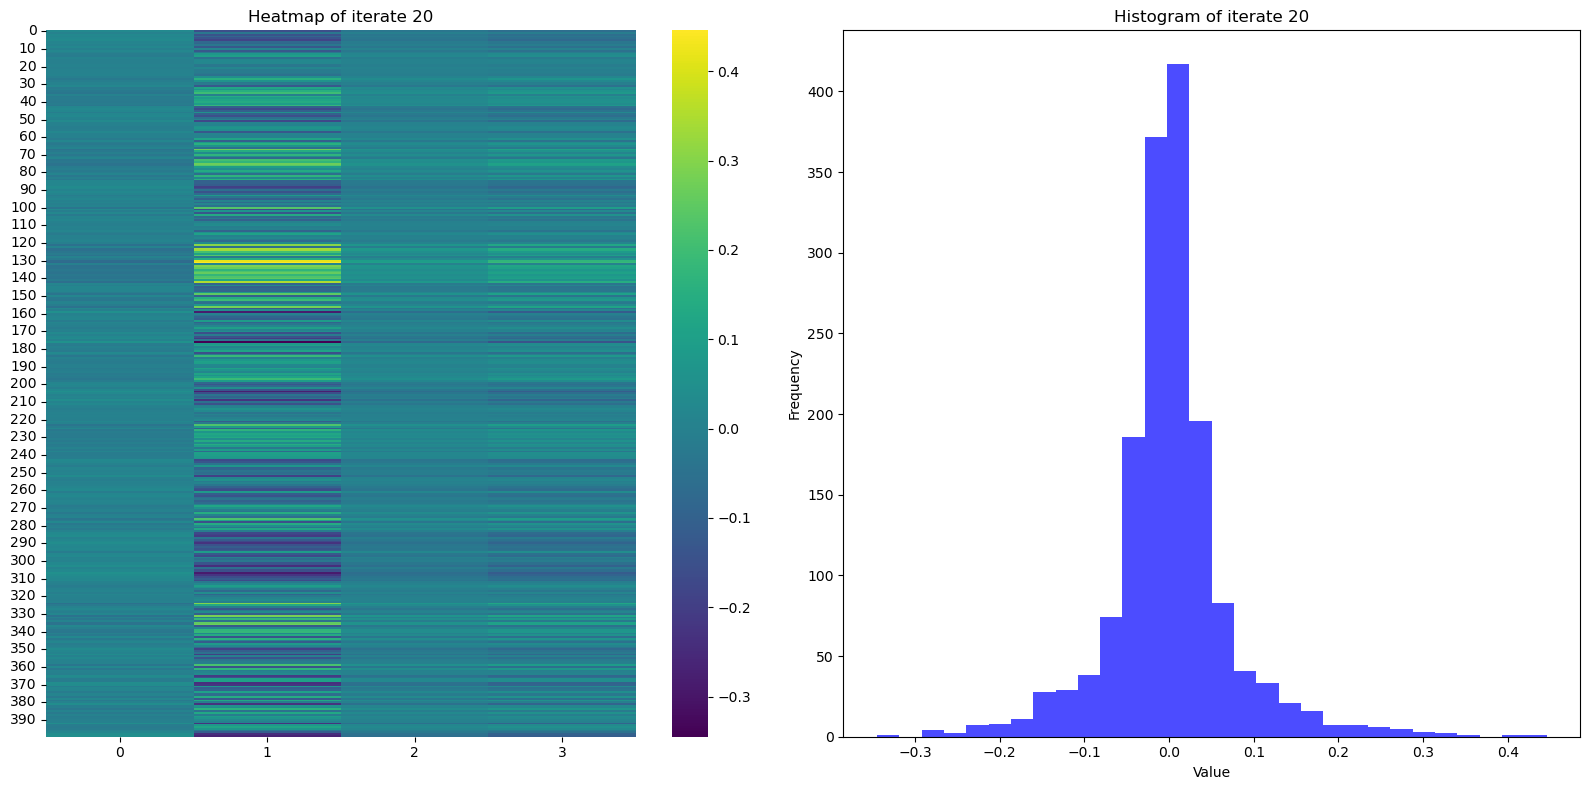

Energy of iterate 20: 2.873593207774407


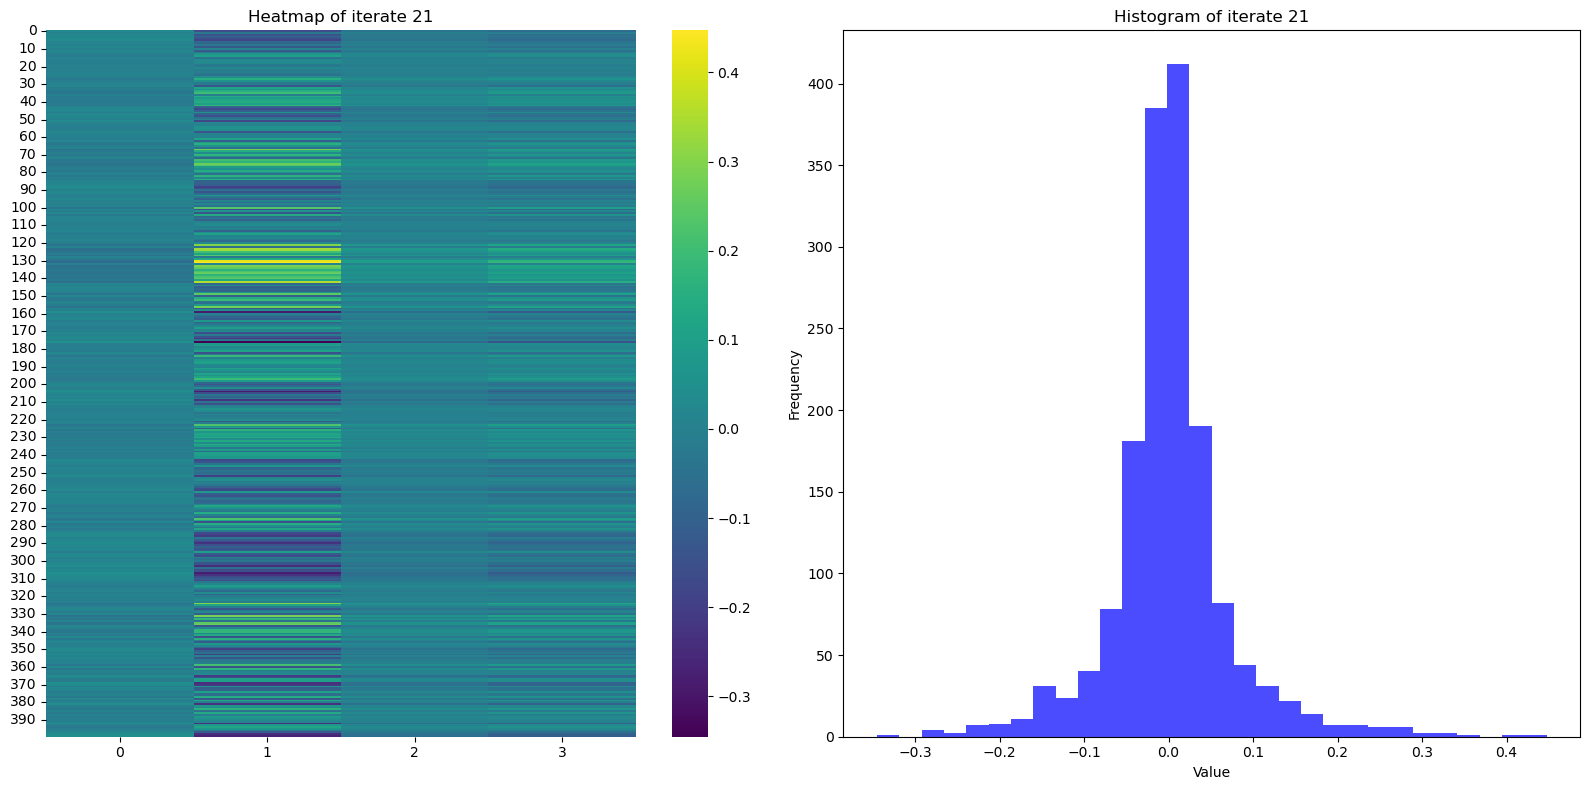

Energy of iterate 21: 2.866253456955195


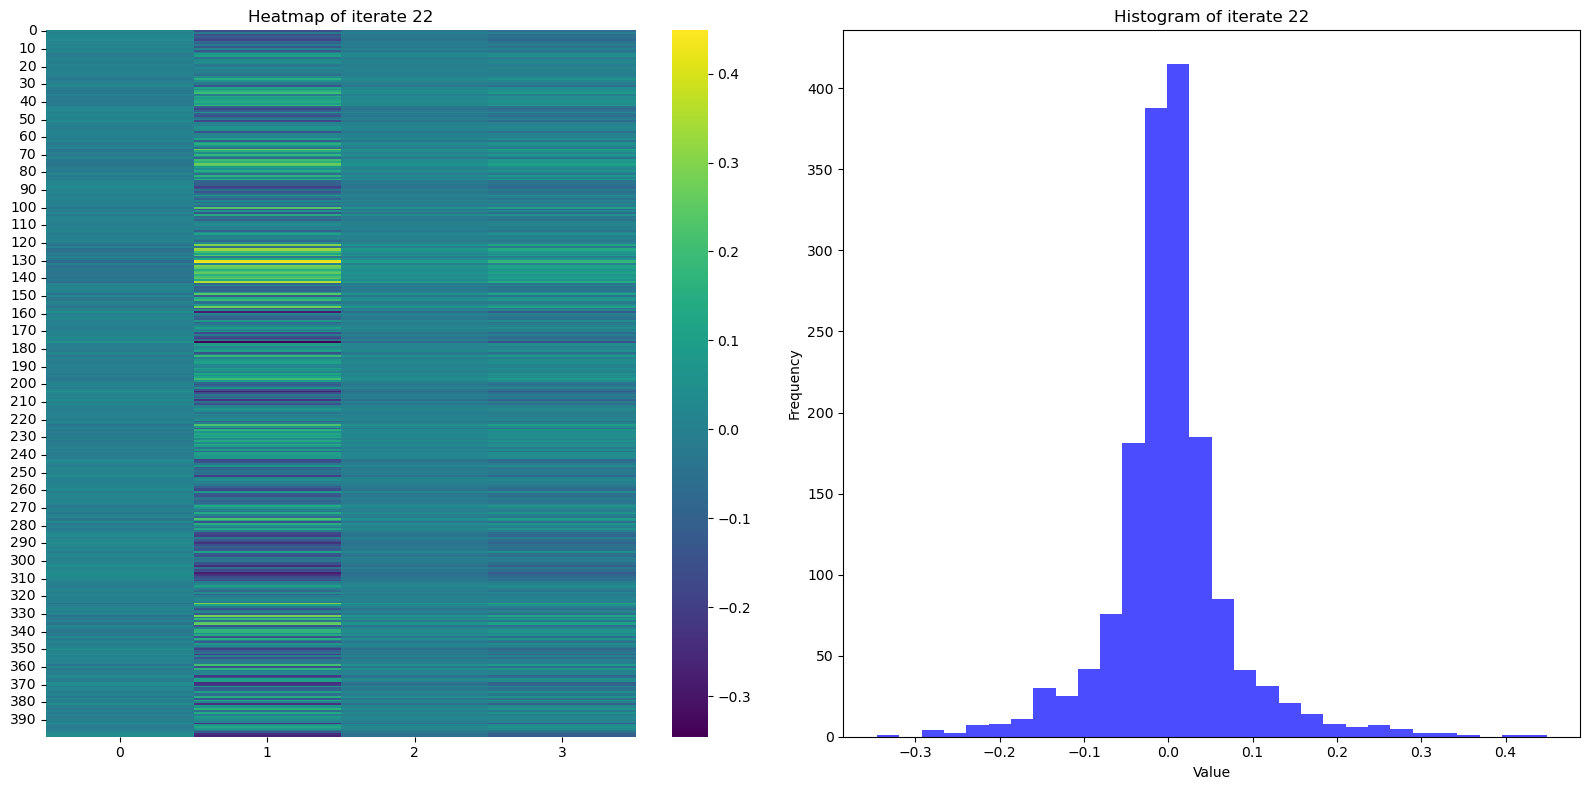

Energy of iterate 22: 2.8594253870281743


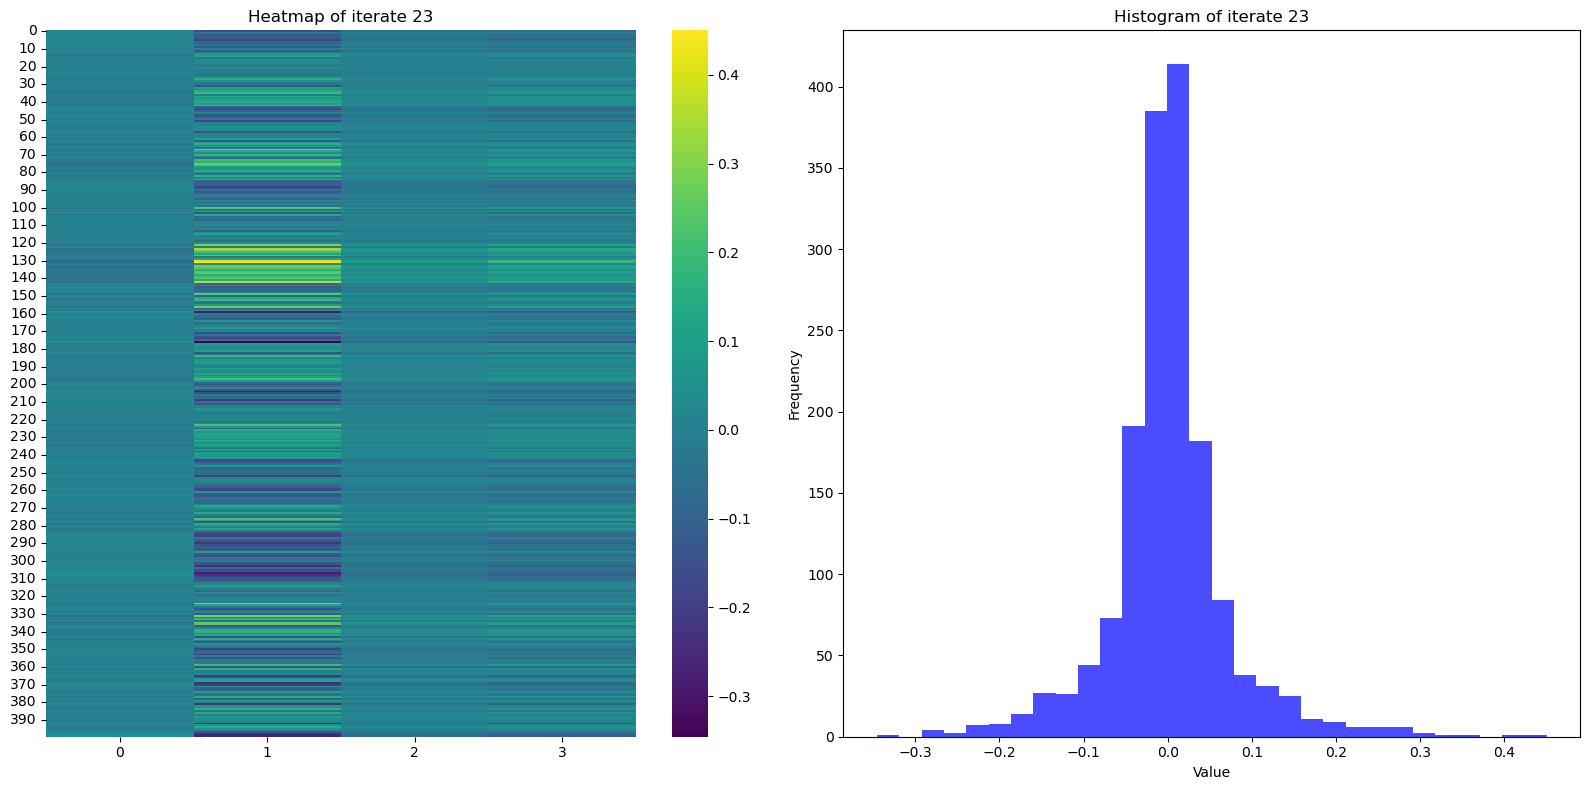

Energy of iterate 23: 2.853145109048722


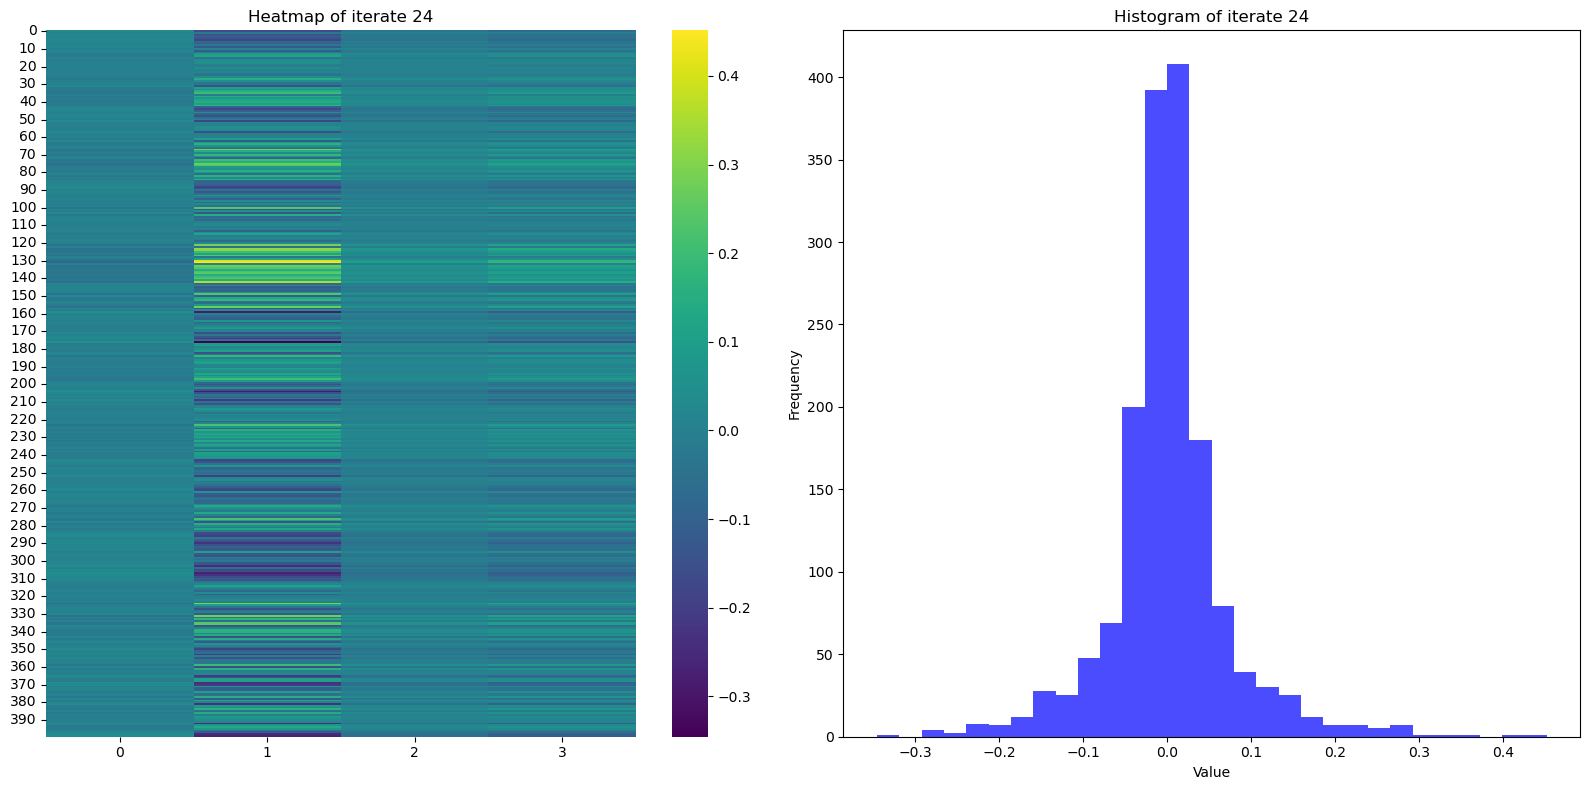

Energy of iterate 24: 2.847450916862298


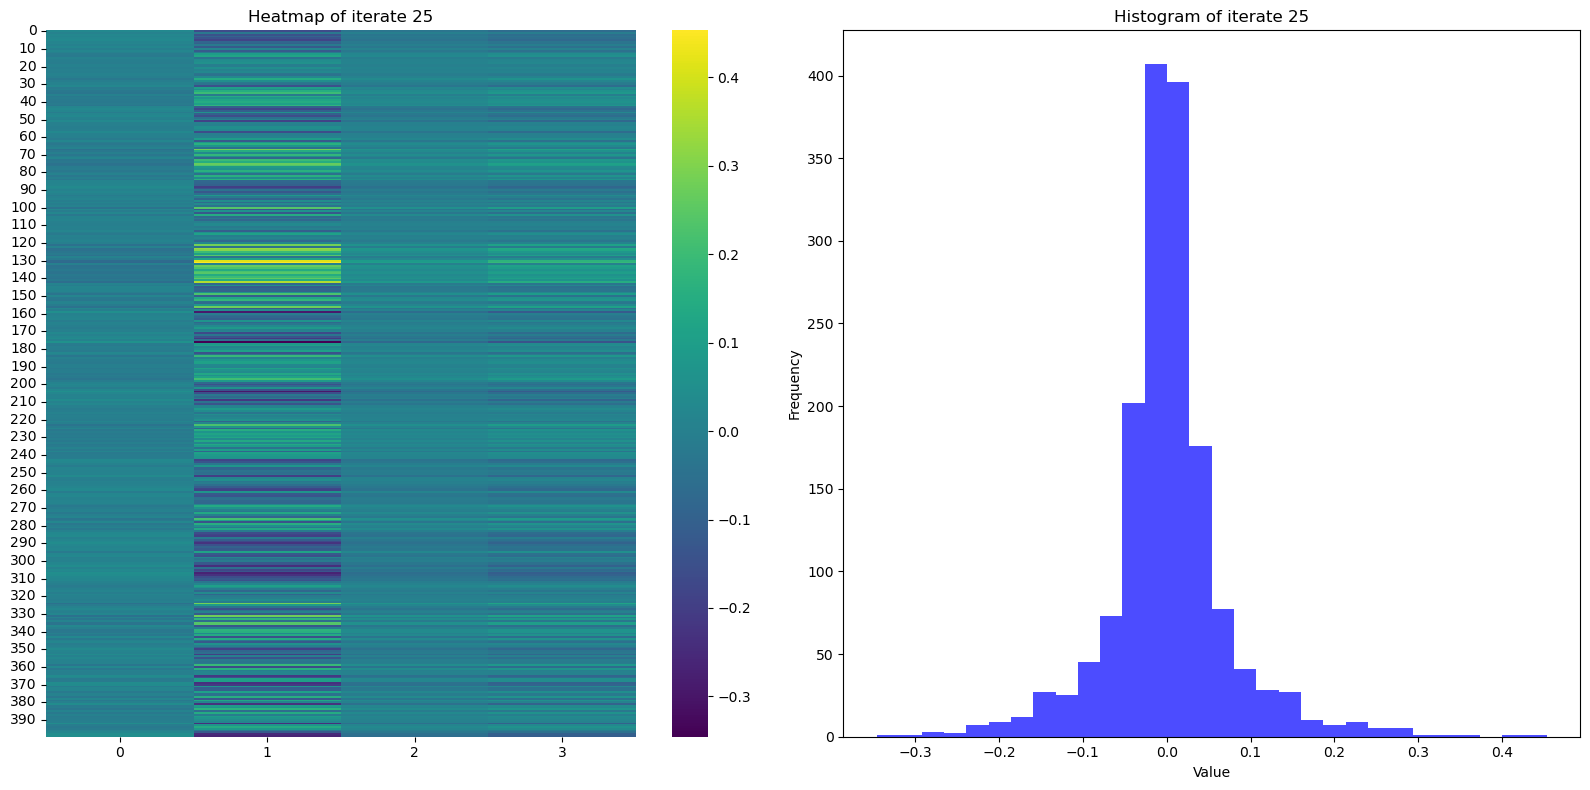

Energy of iterate 25: 2.8423826406724584


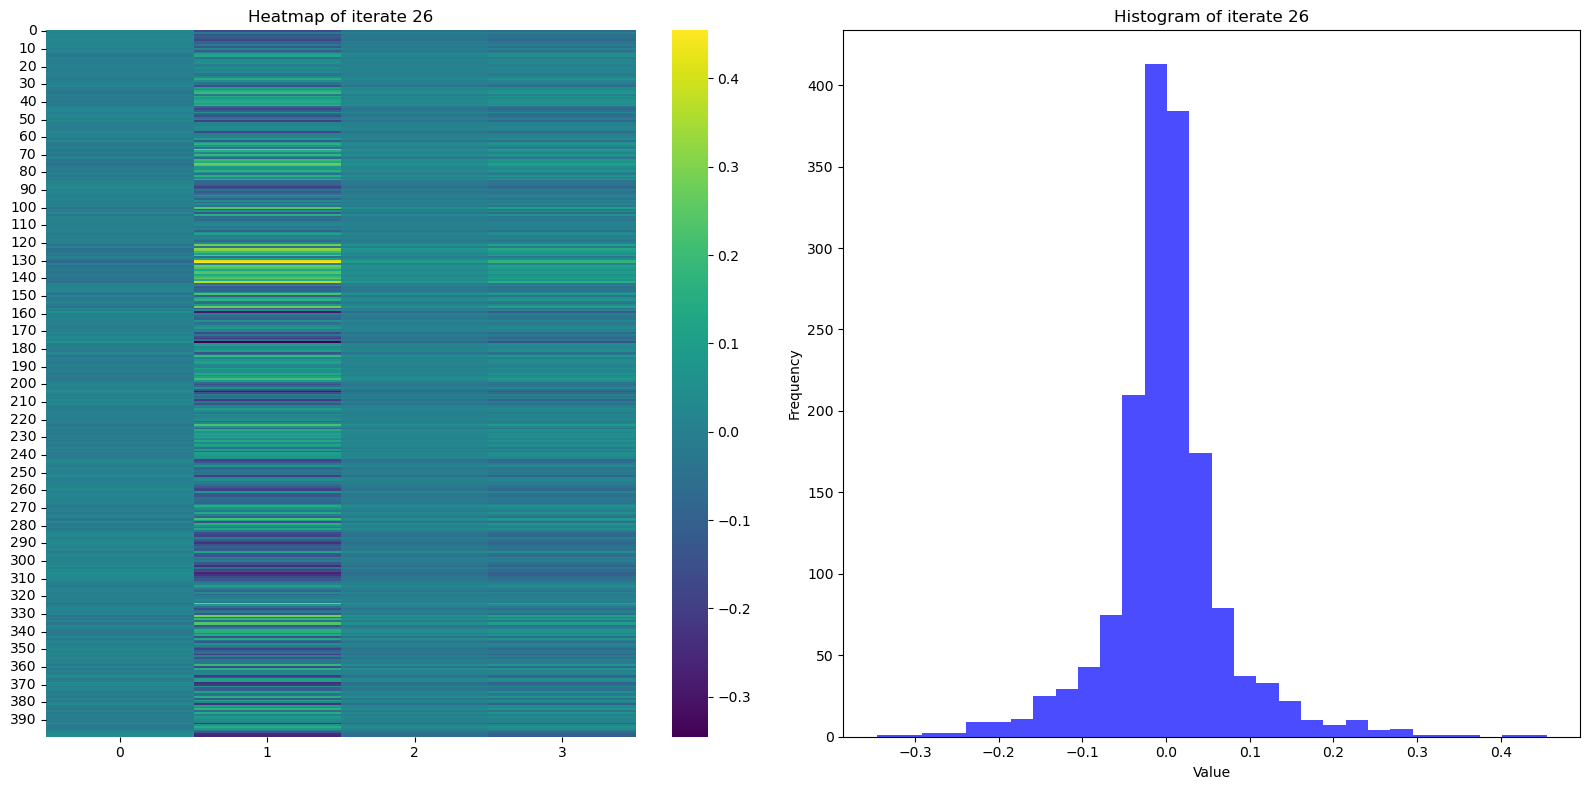

Energy of iterate 26: 2.83798079930338


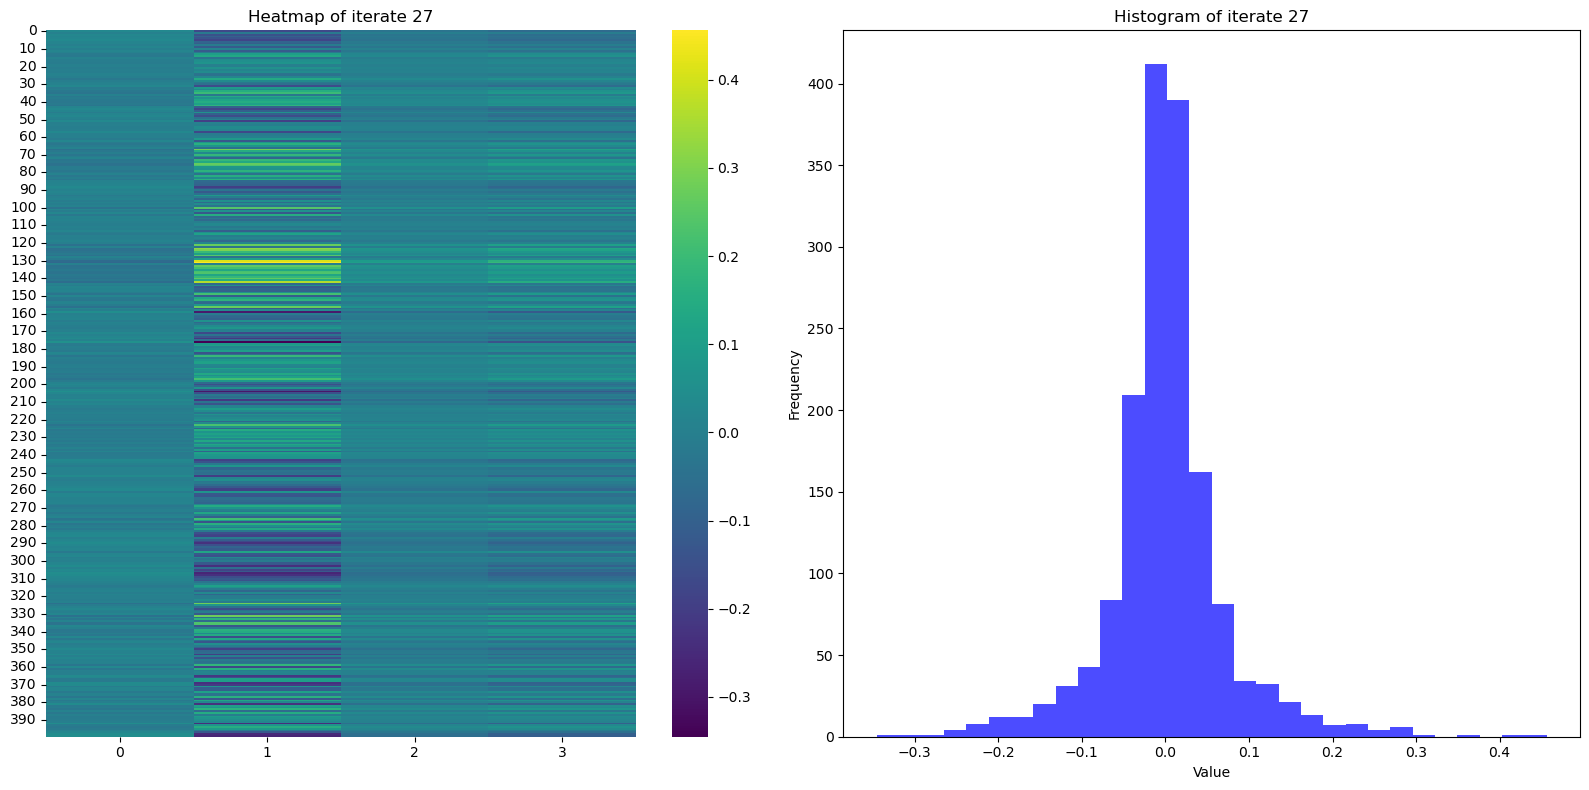

Energy of iterate 27: 2.8342856934650094


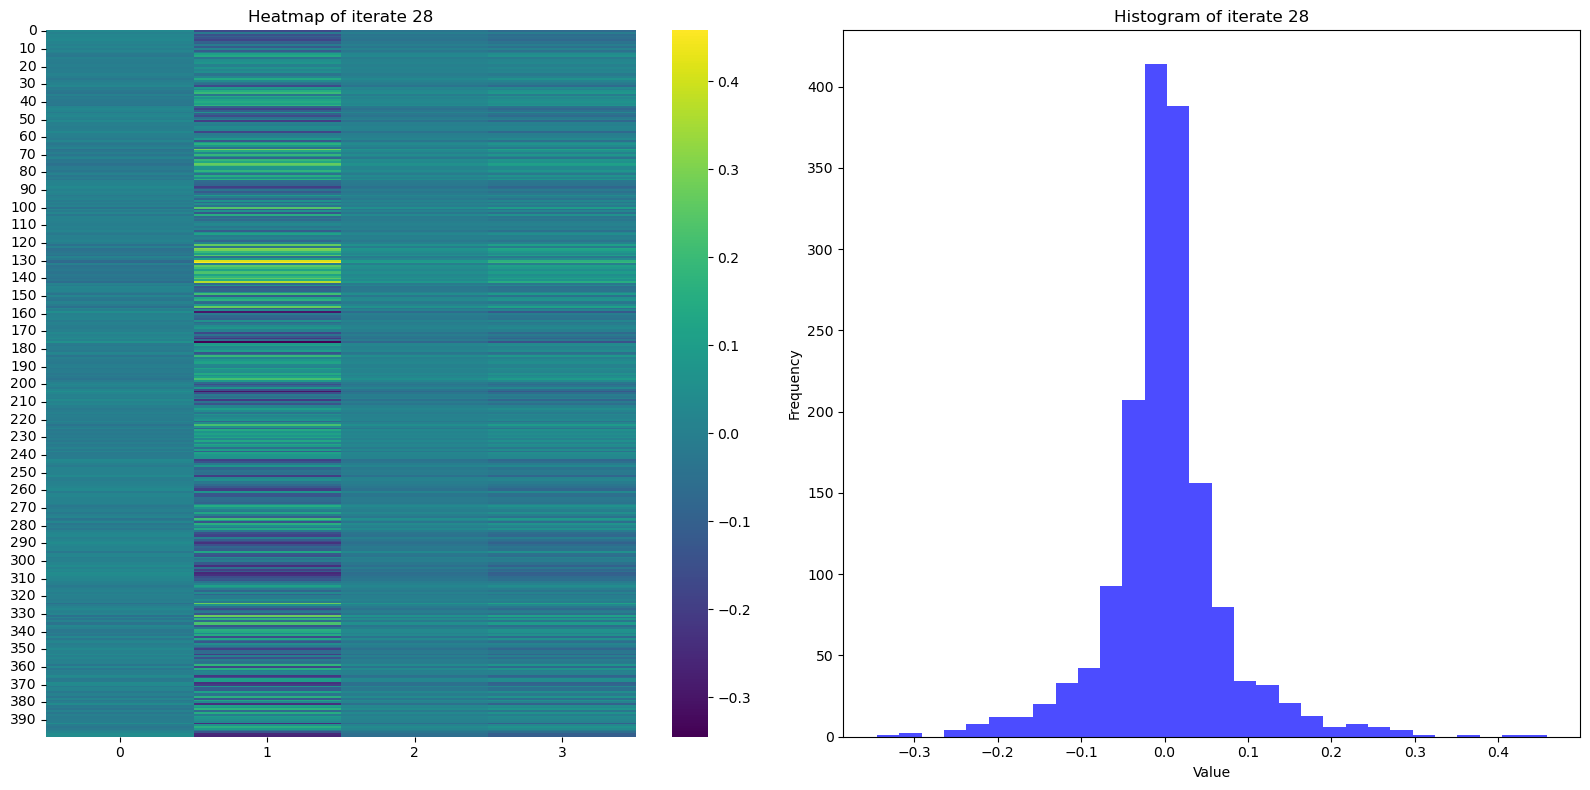

Energy of iterate 28: 2.8313365773929204


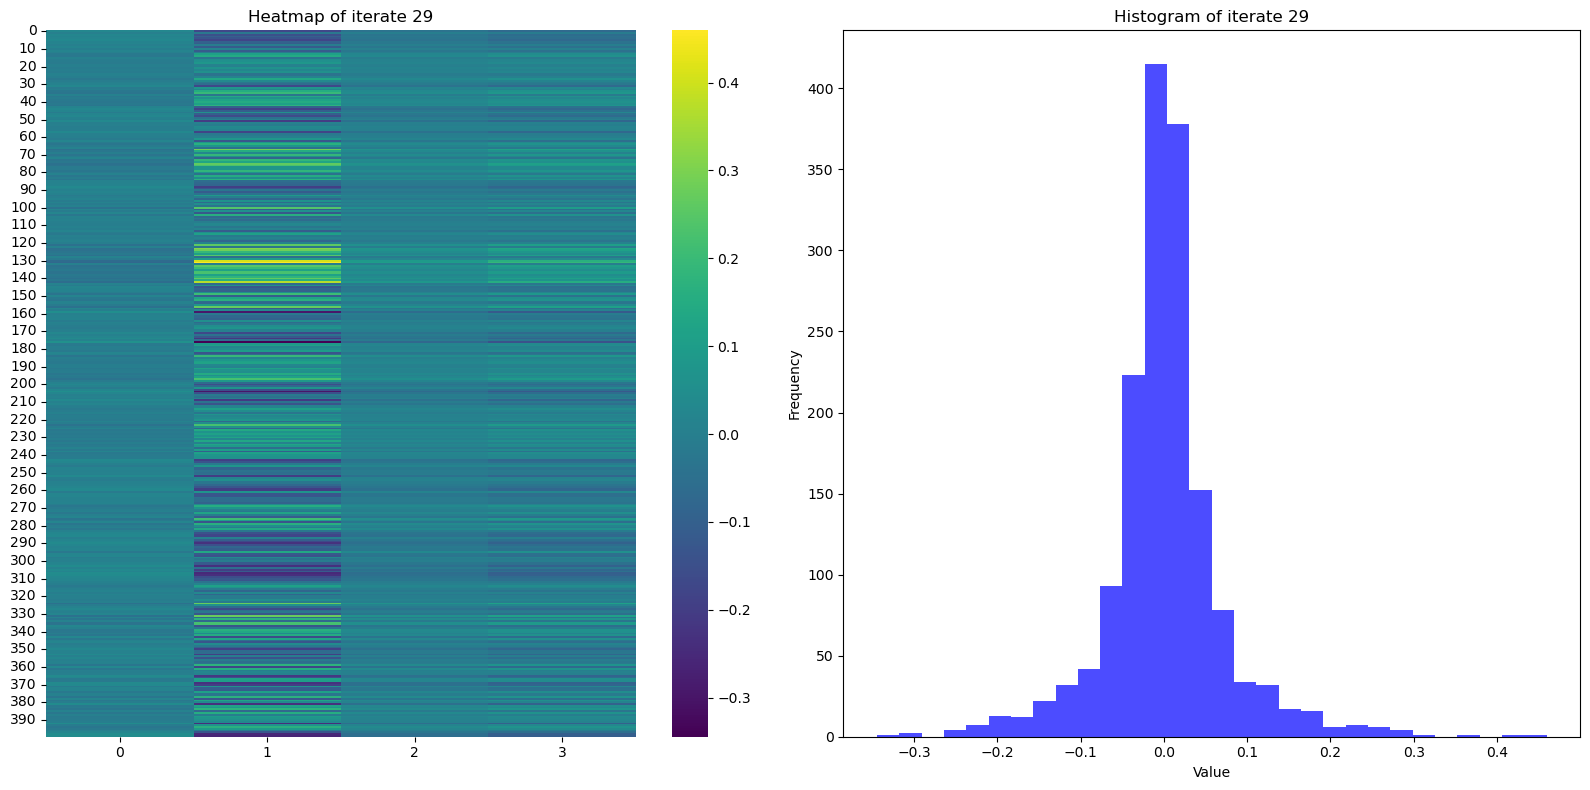

Energy of iterate 29: 2.8291710389494065


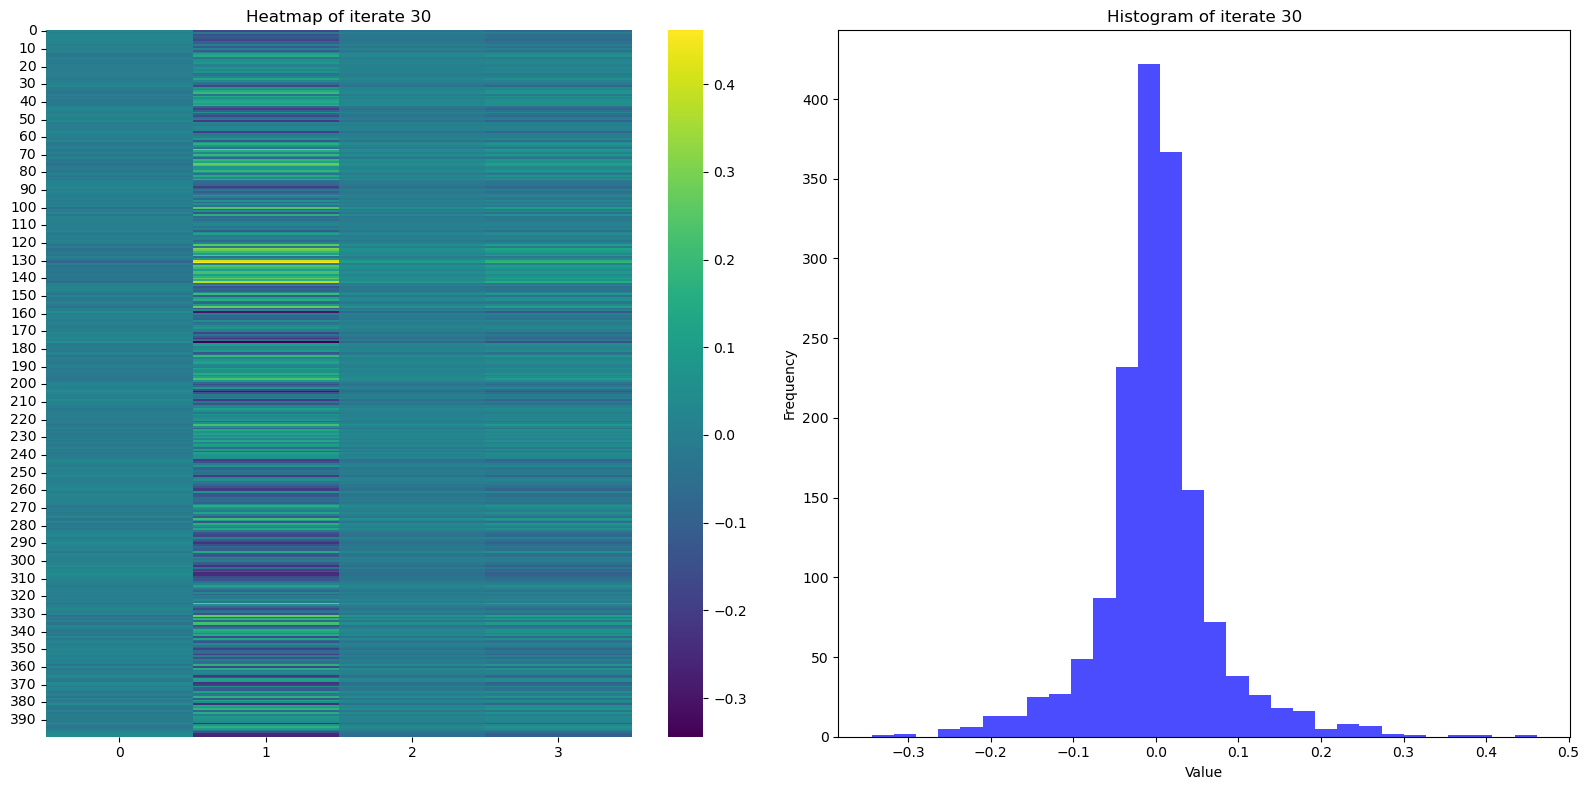

Energy of iterate 30: 2.8278247021079053


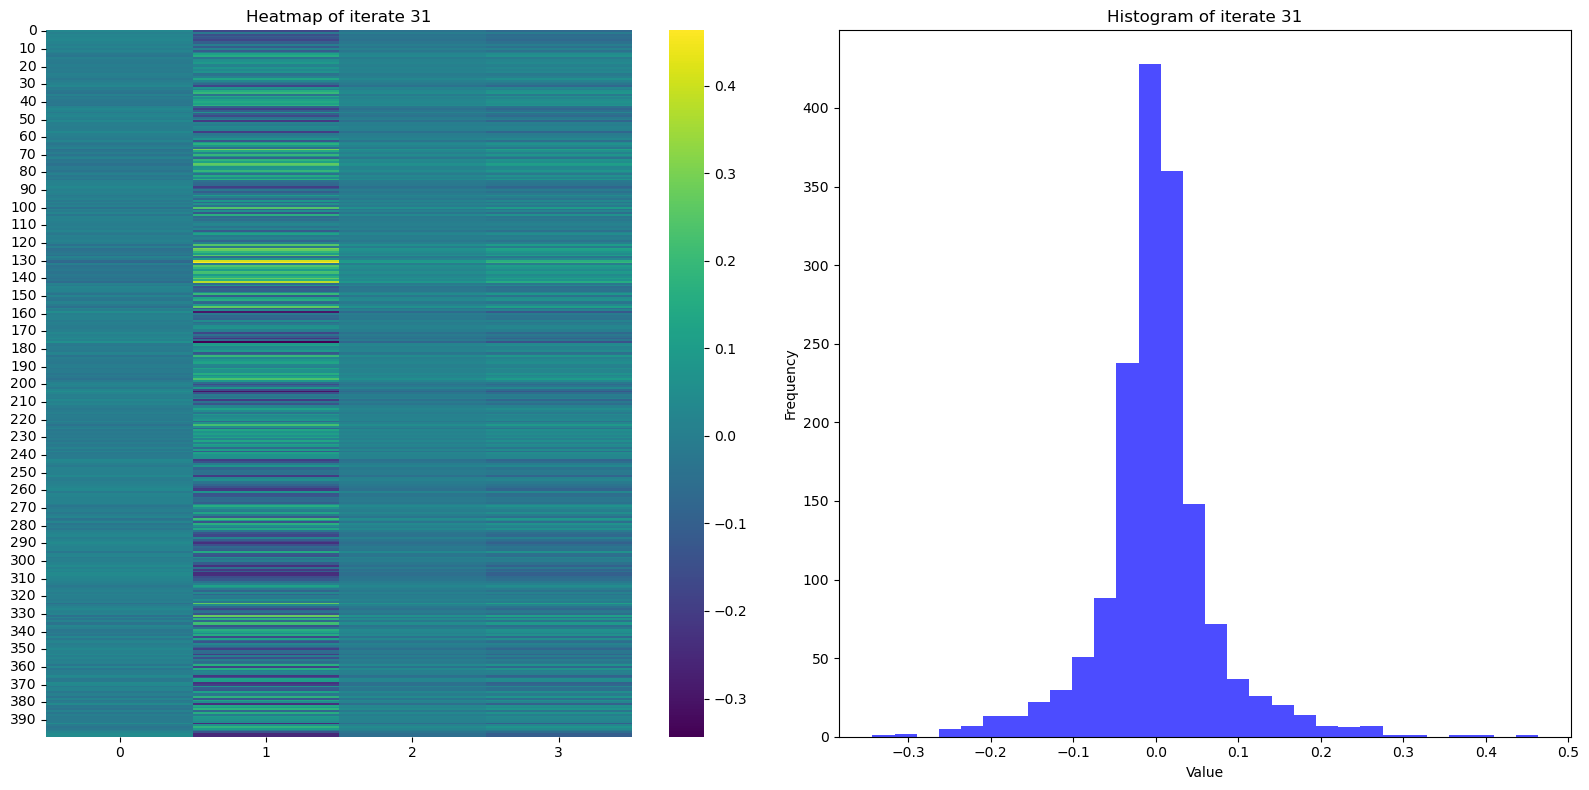

Energy of iterate 31: 2.827331335408424


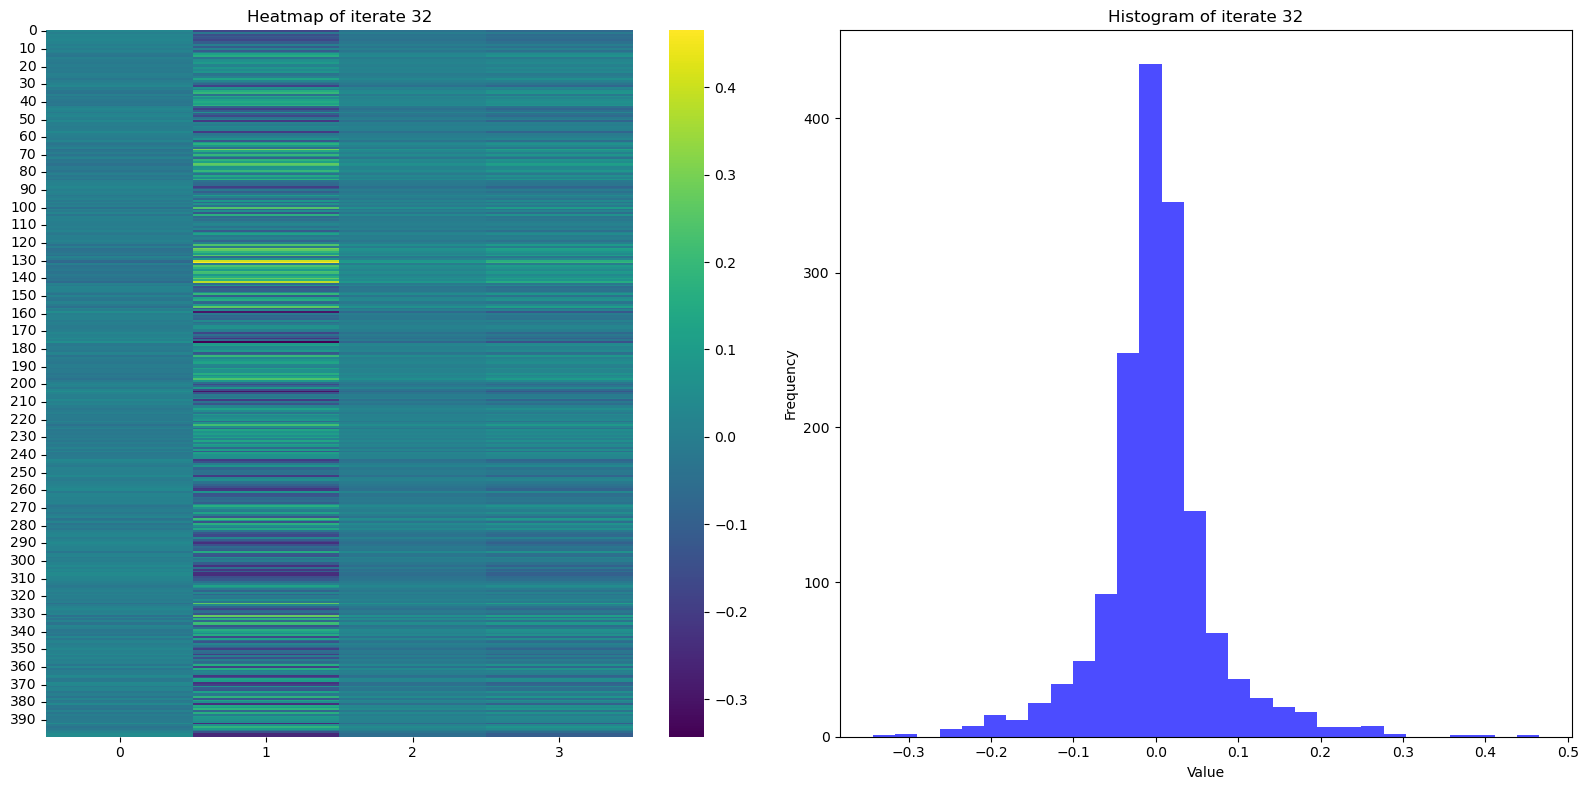

Energy of iterate 32: 2.8277234031991614


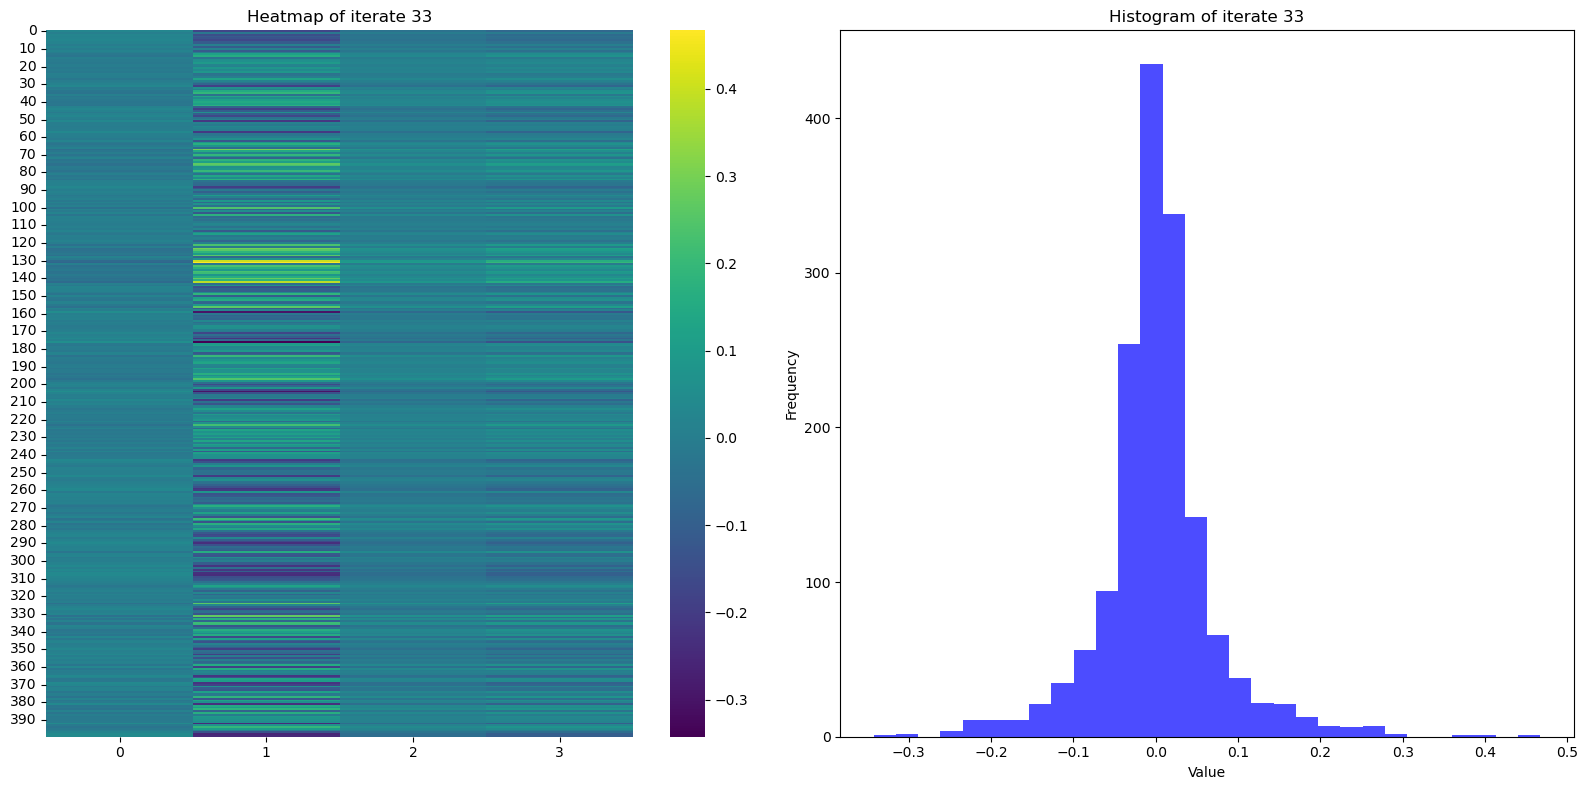

Energy of iterate 33: 2.8290330348040693


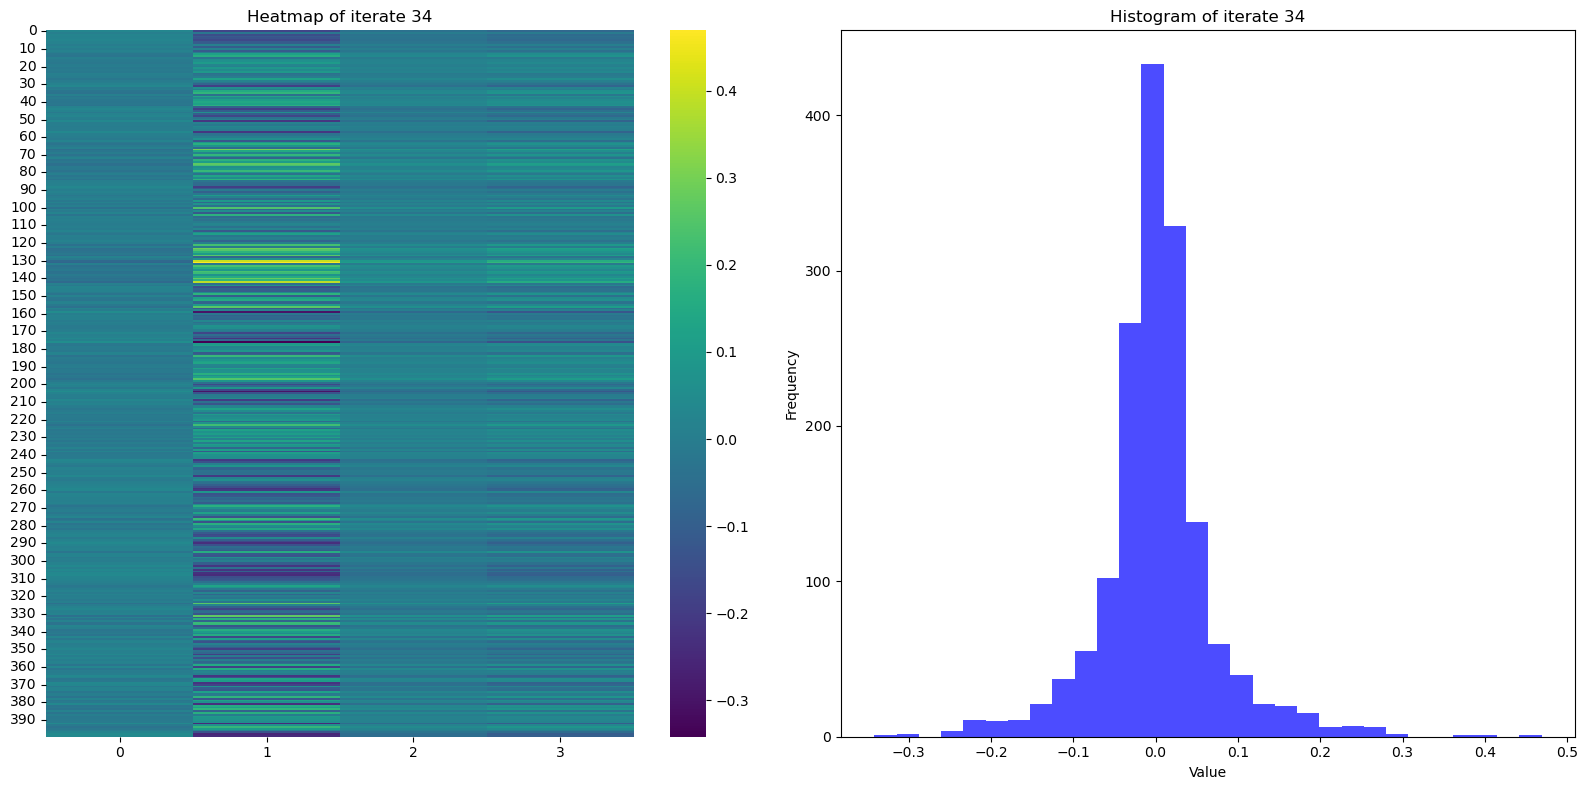

Energy of iterate 34: 2.8312933145722123


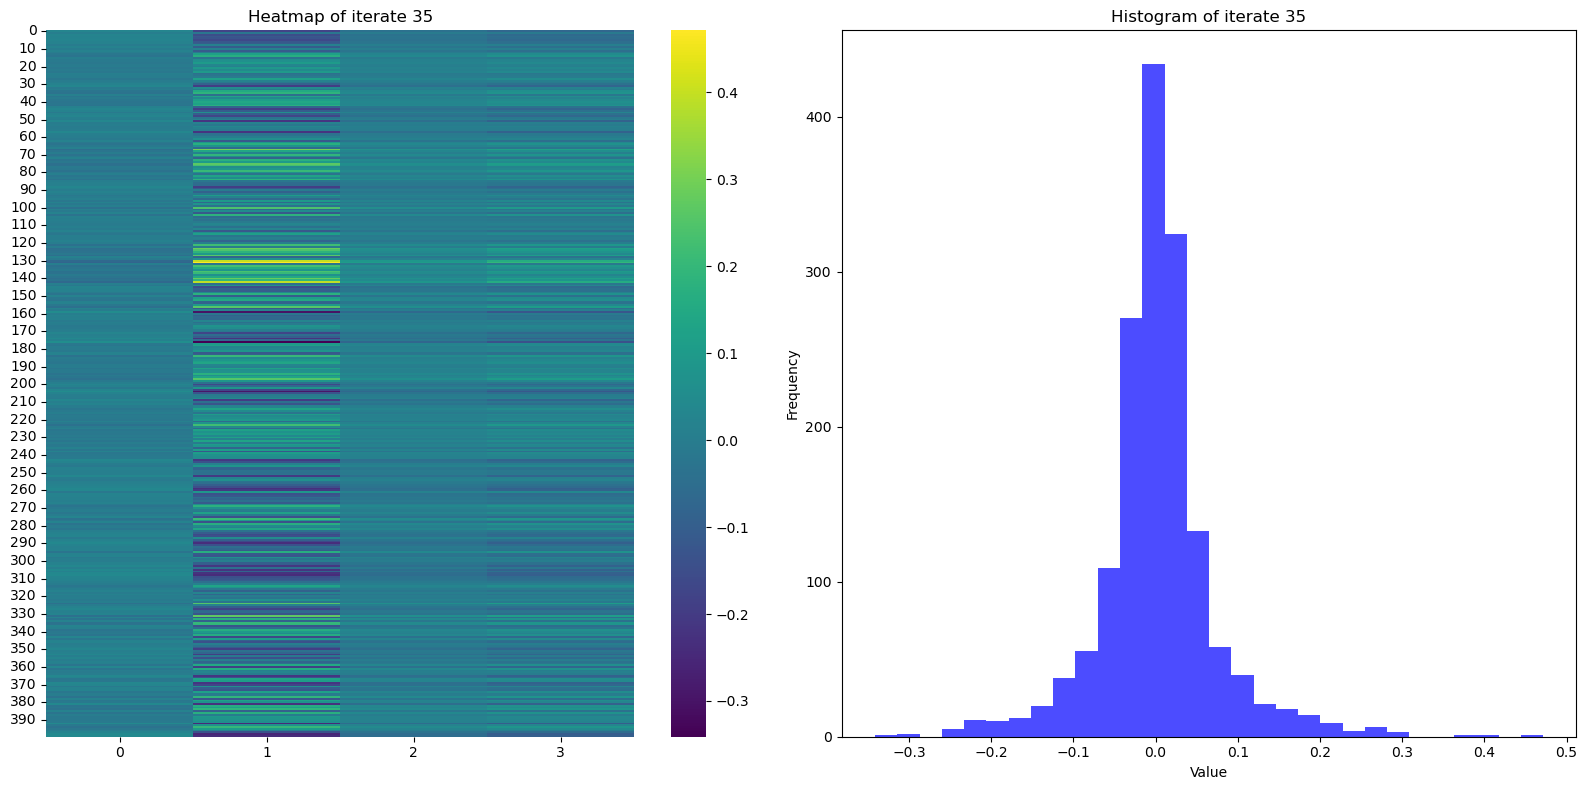

Energy of iterate 35: 2.8345397178103204


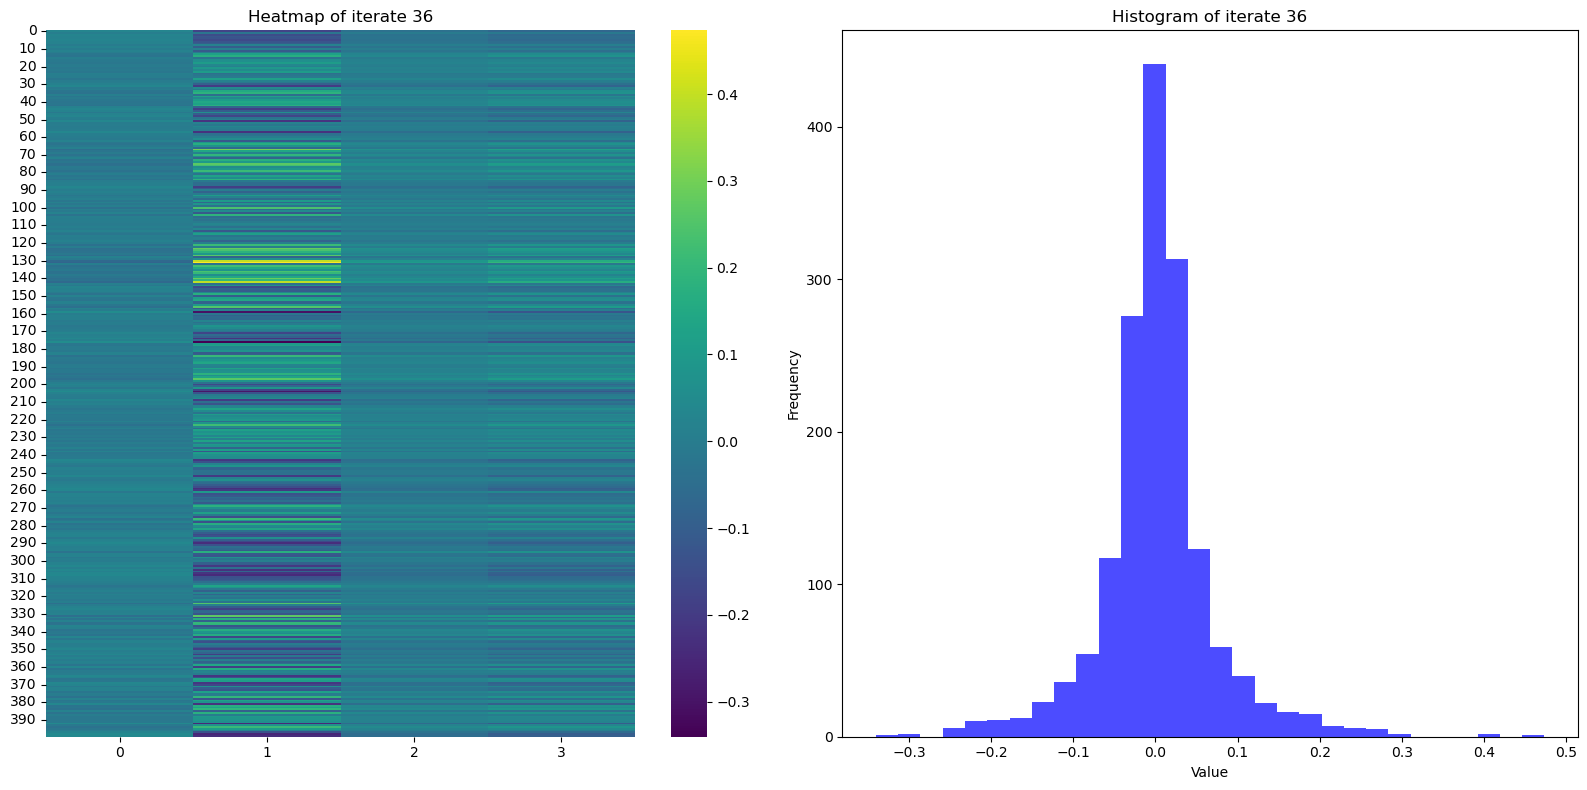

Energy of iterate 36: 2.8388114361350496


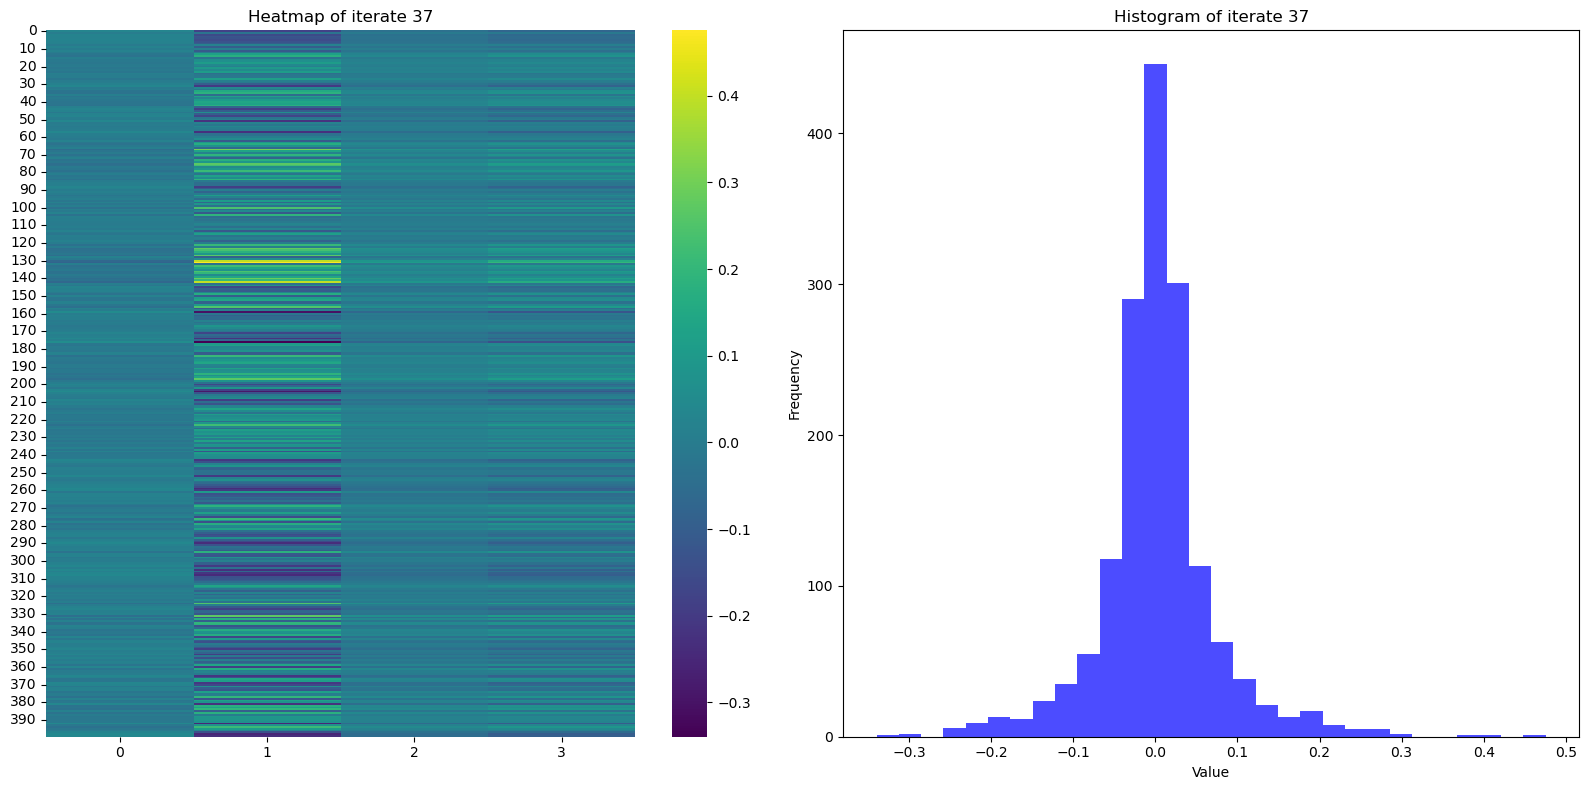

Energy of iterate 37: 2.8441522493888547


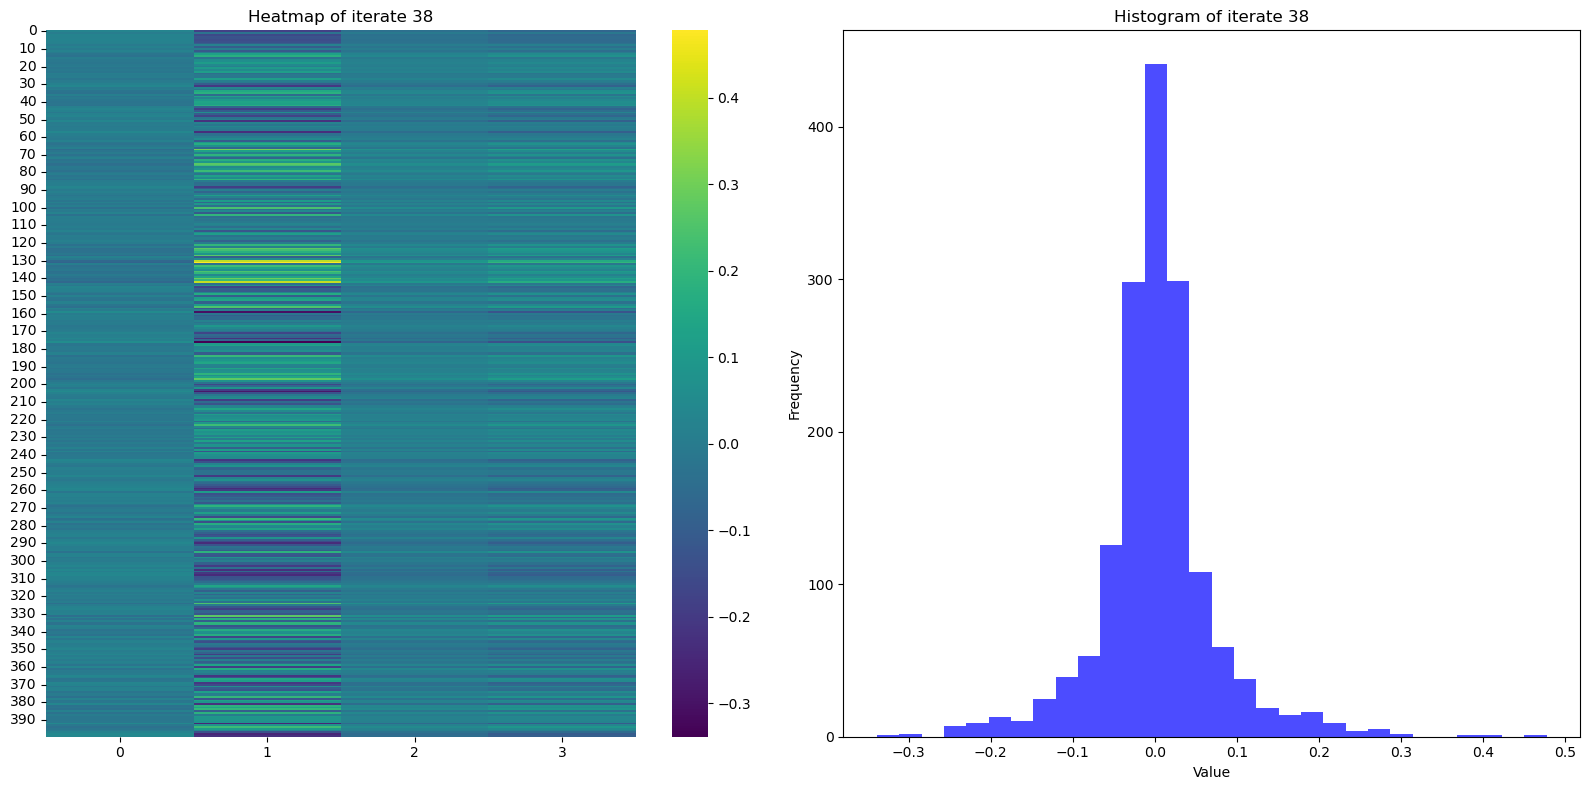

Energy of iterate 38: 2.850610507113792


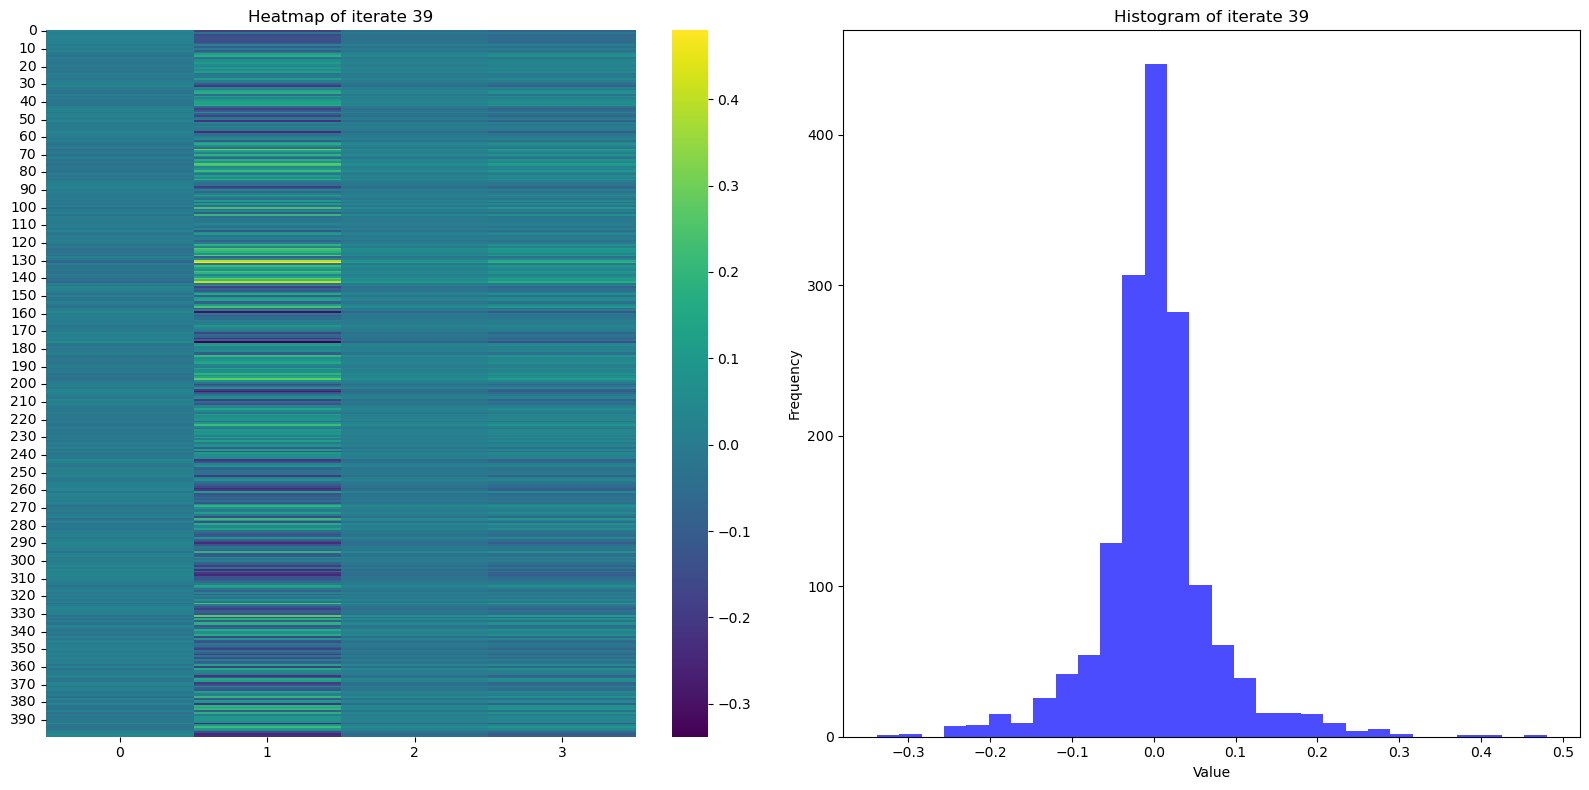

Energy of iterate 39: 2.858237683513855


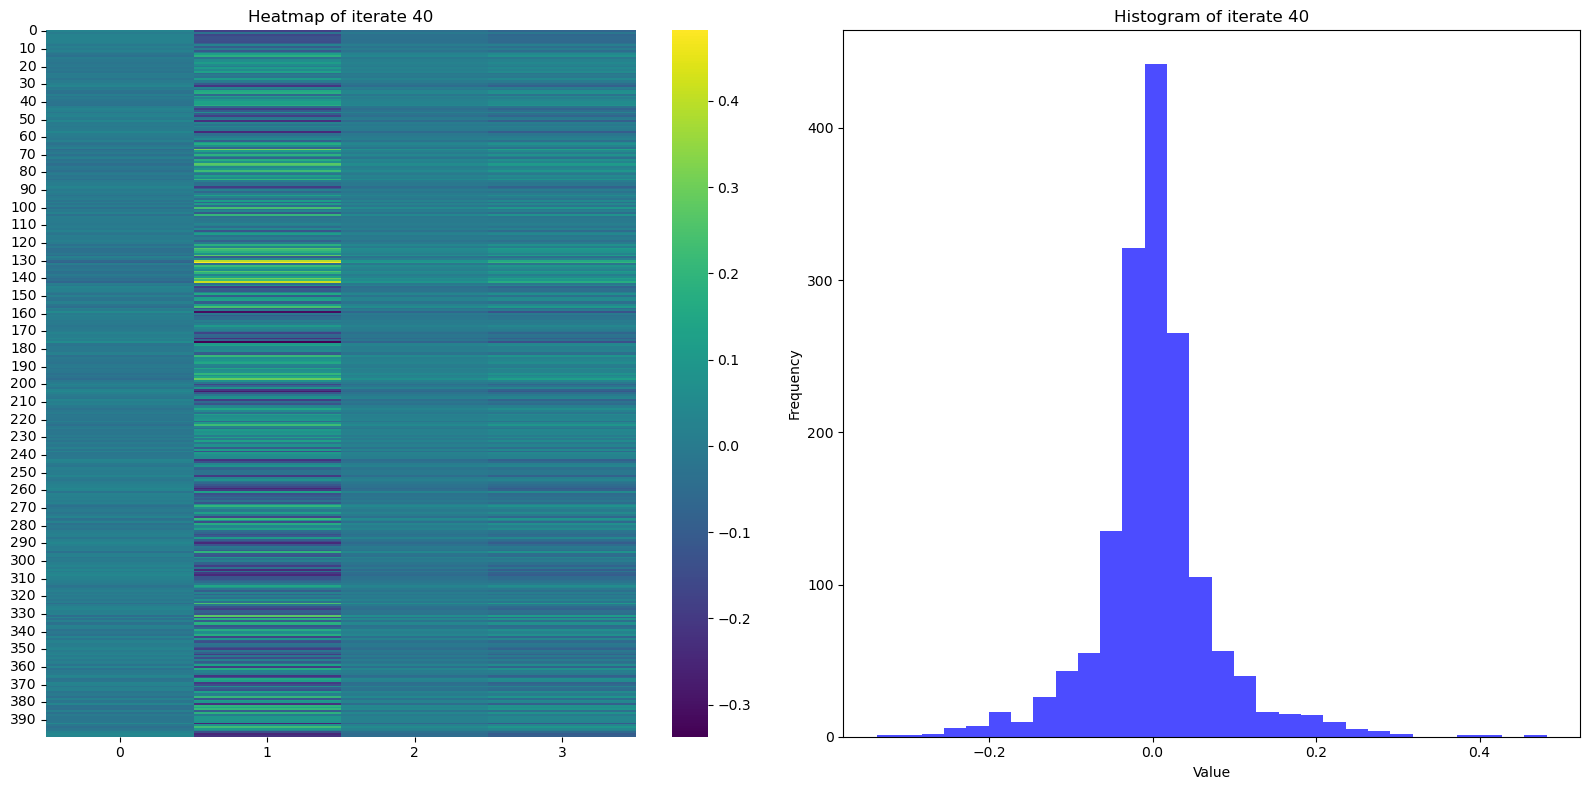

Energy of iterate 40: 2.8670848868693533


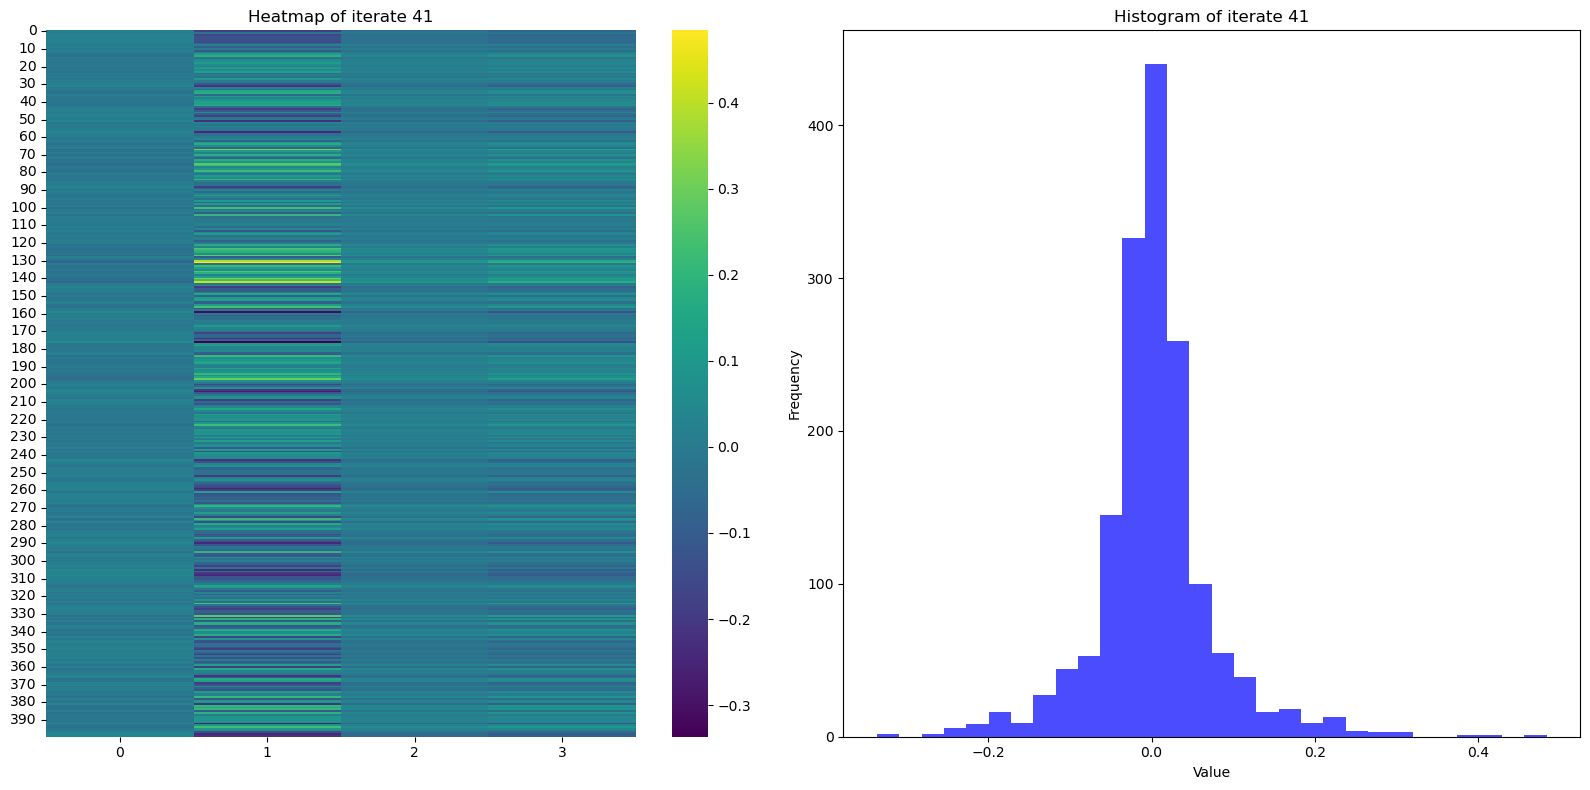

Energy of iterate 41: 2.8771966932871593


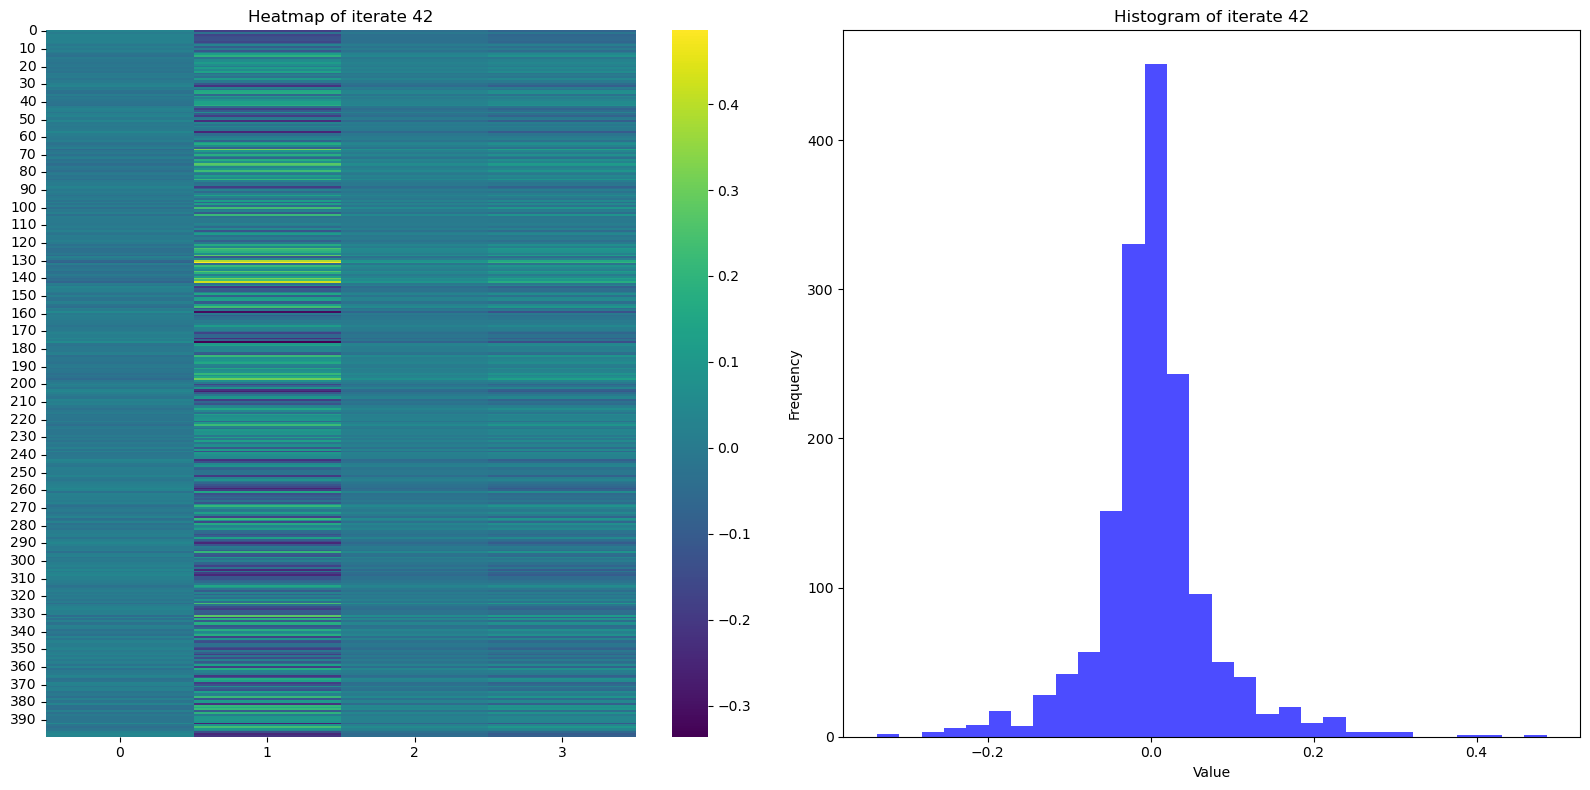

Energy of iterate 42: 2.8886018401028632


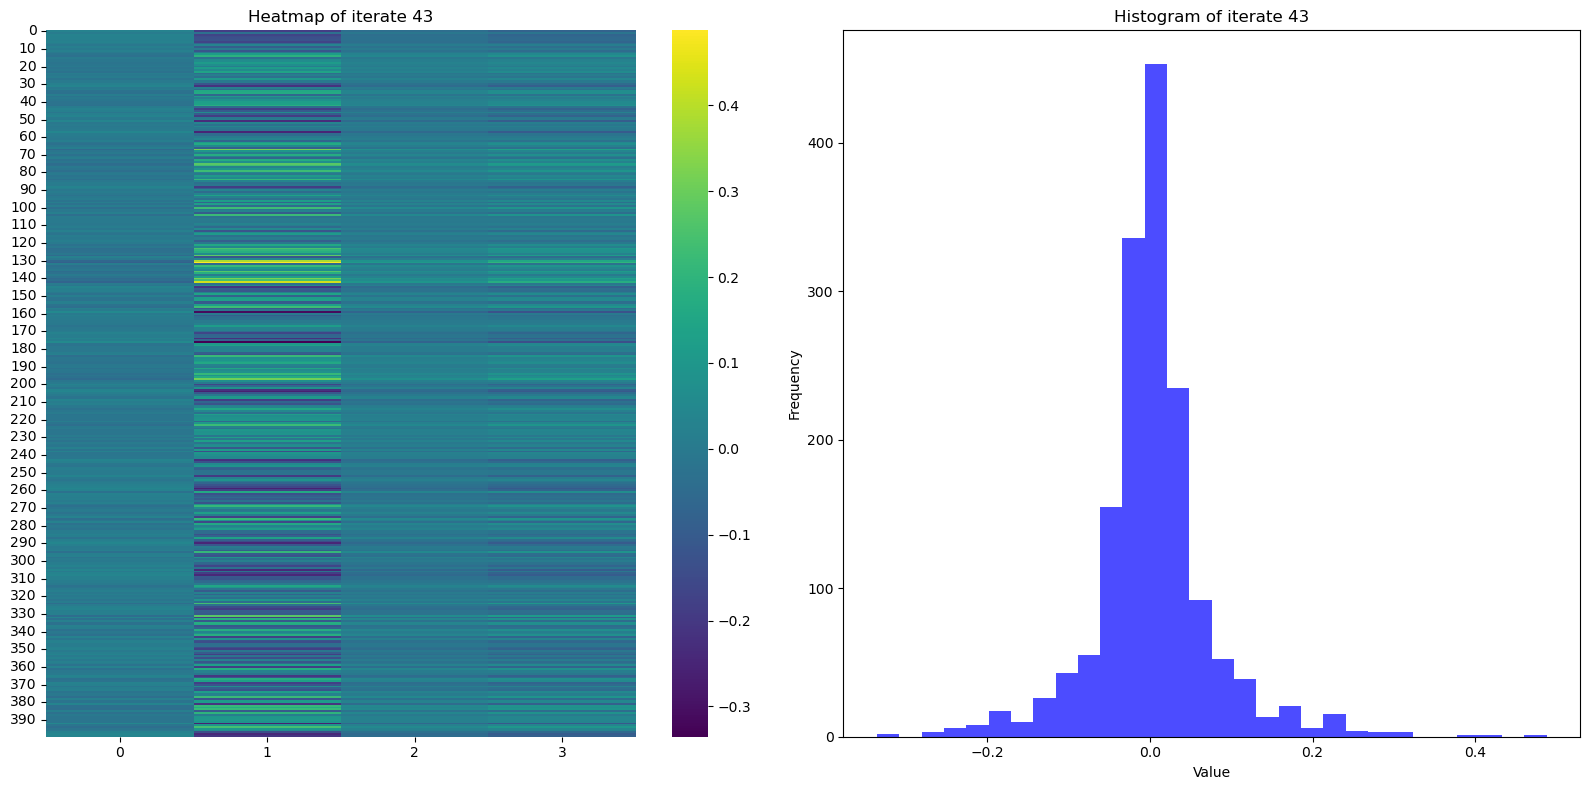

Energy of iterate 43: 2.9013008032493075


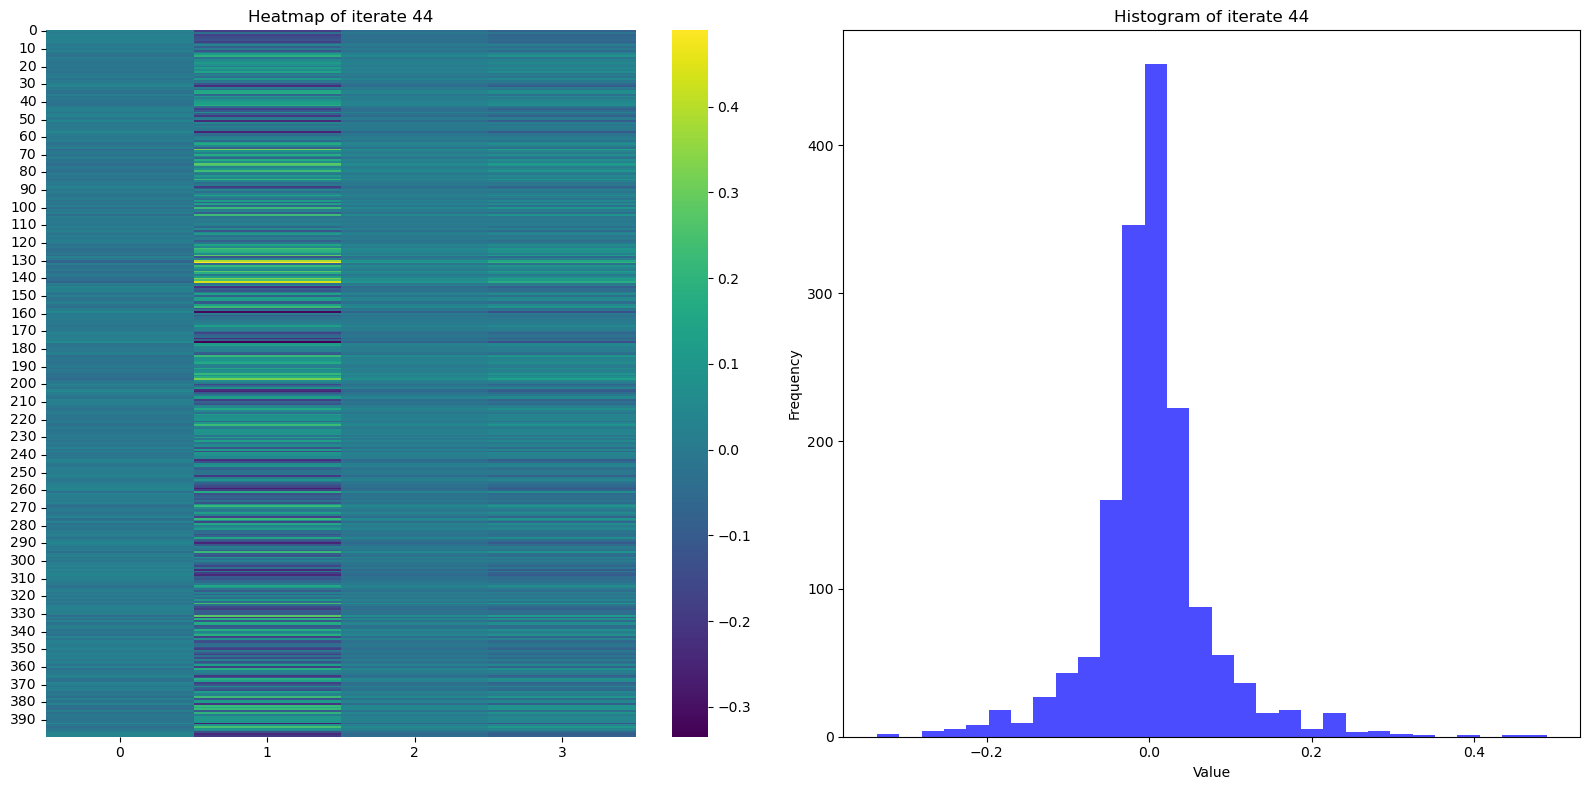

Energy of iterate 44: 2.91525122634677


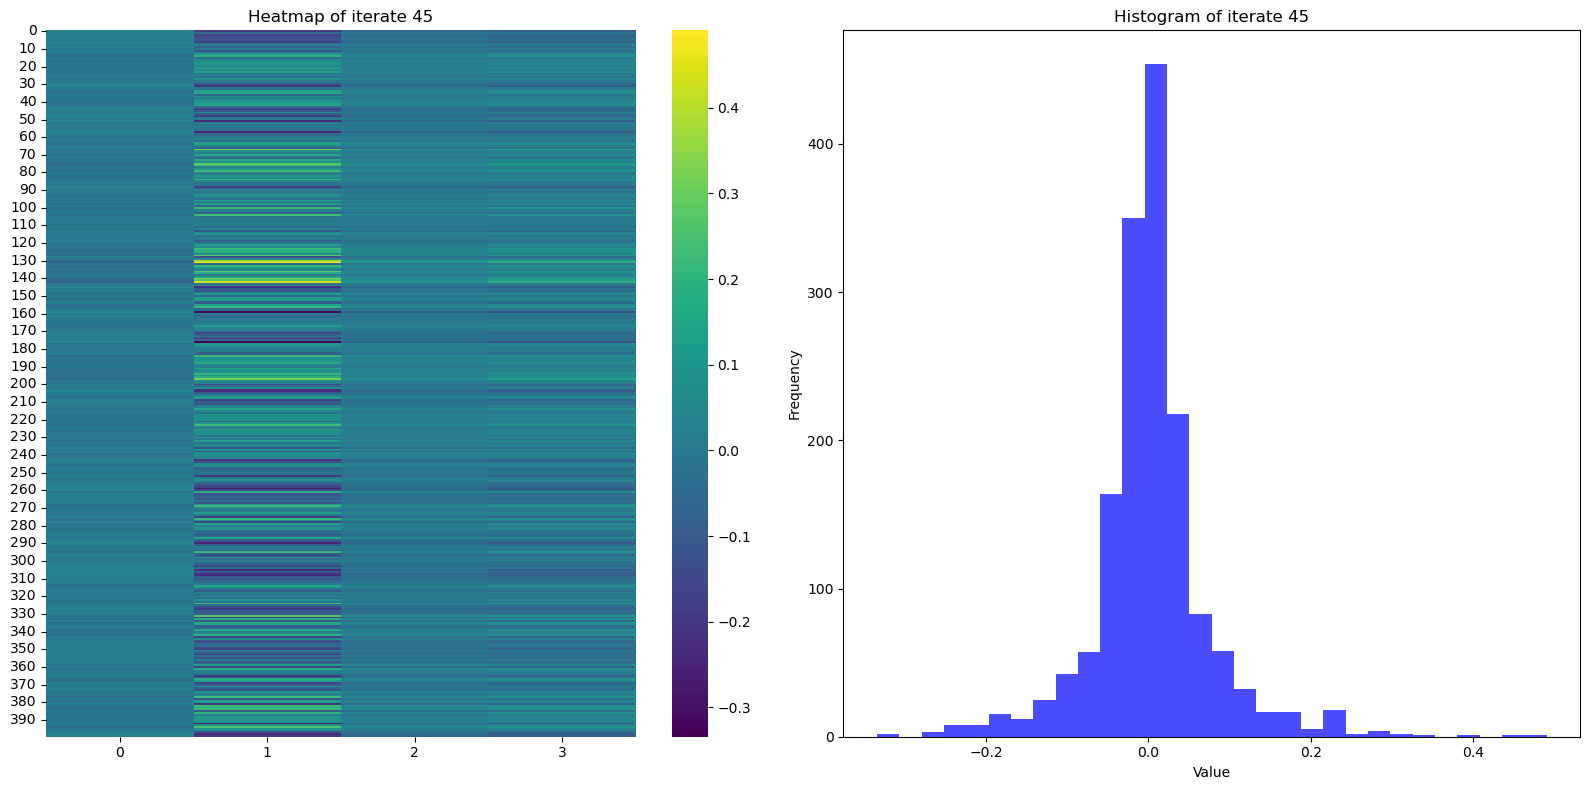

Energy of iterate 45: 2.9303535420721687


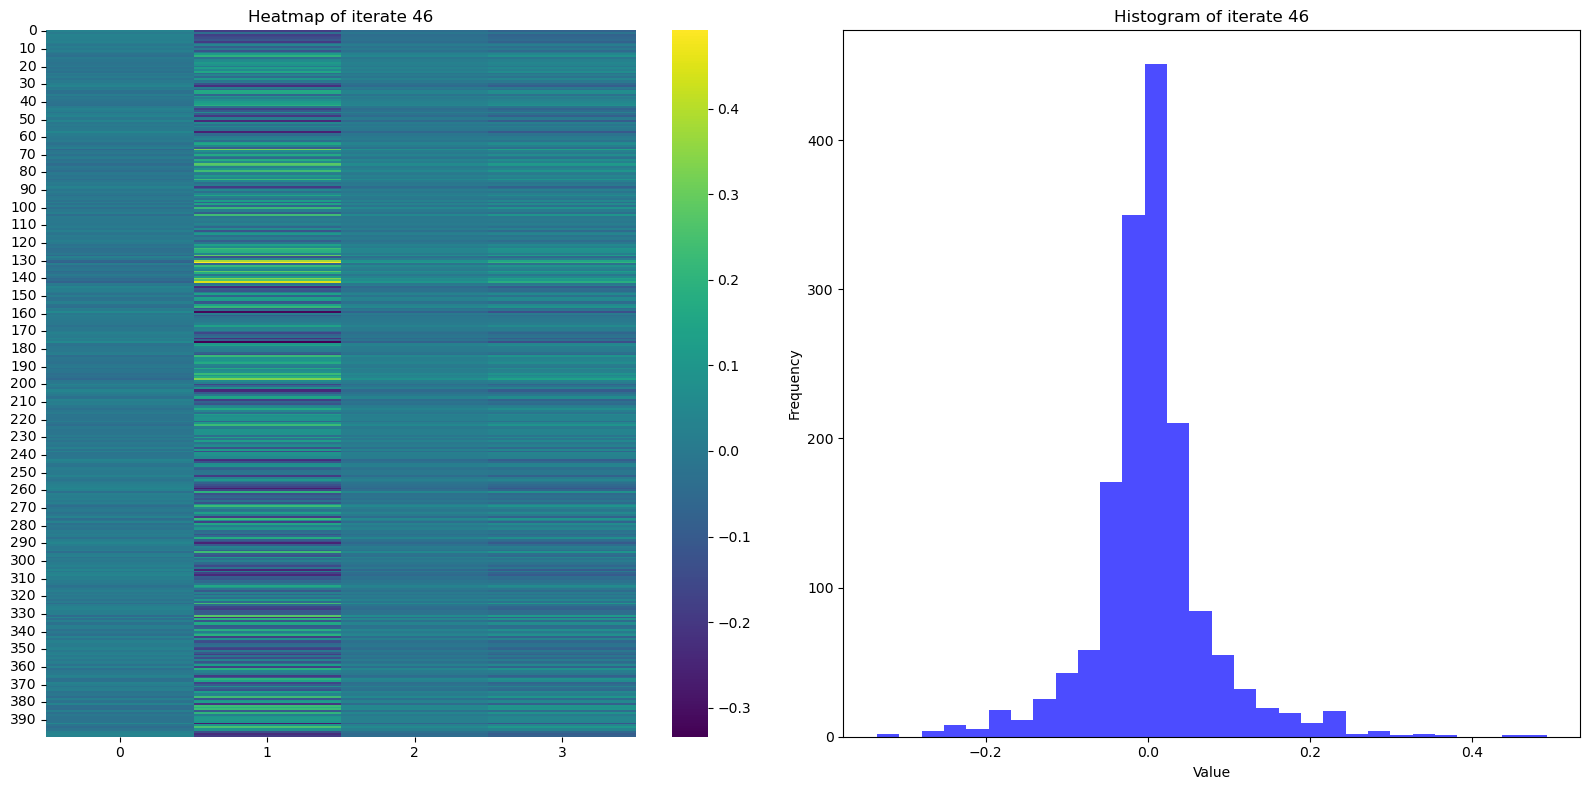

Energy of iterate 46: 2.9464405556236954


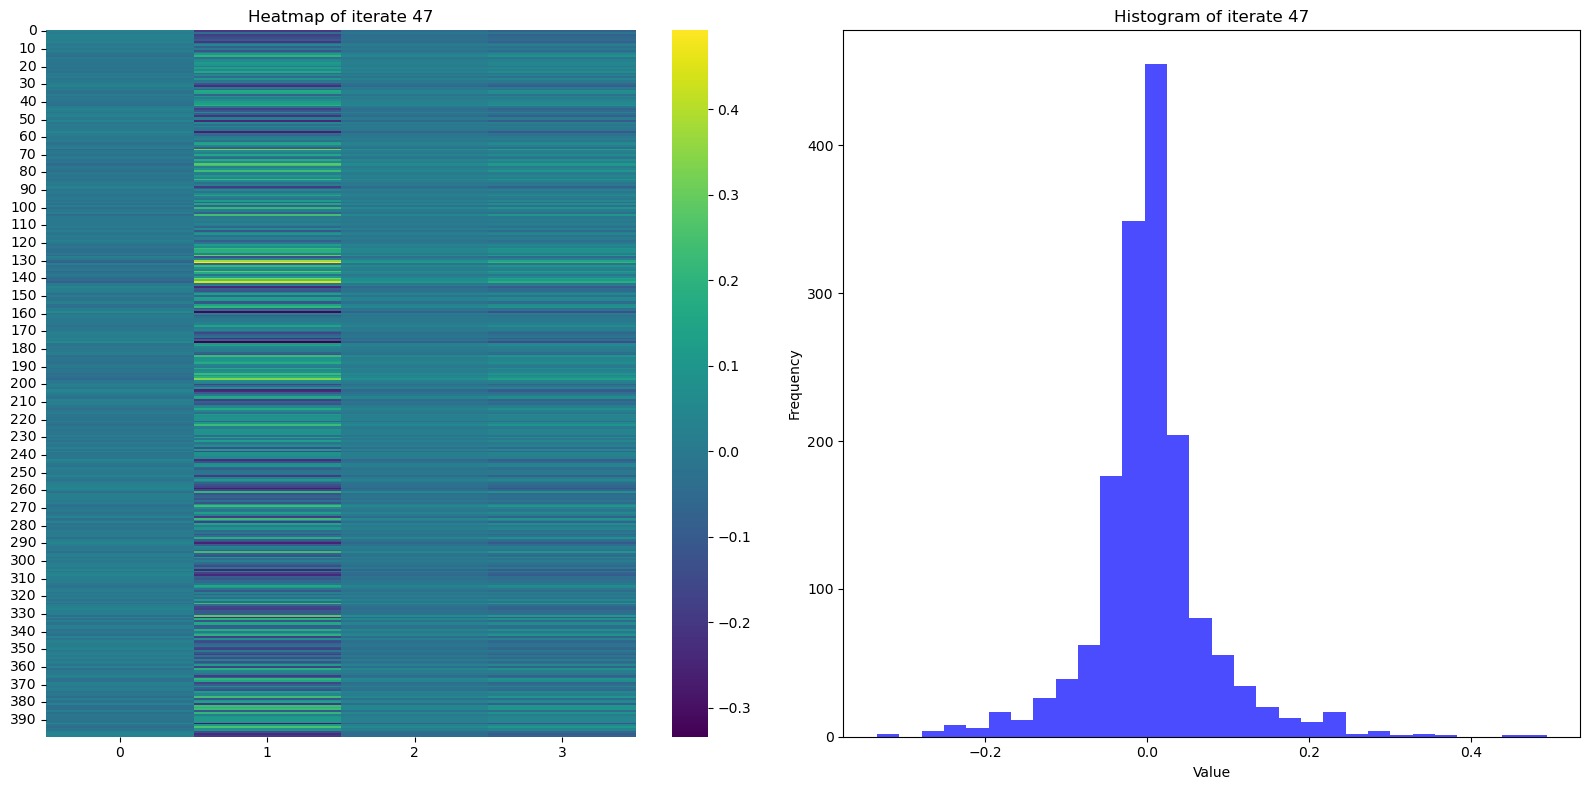

Energy of iterate 47: 2.963275441997757


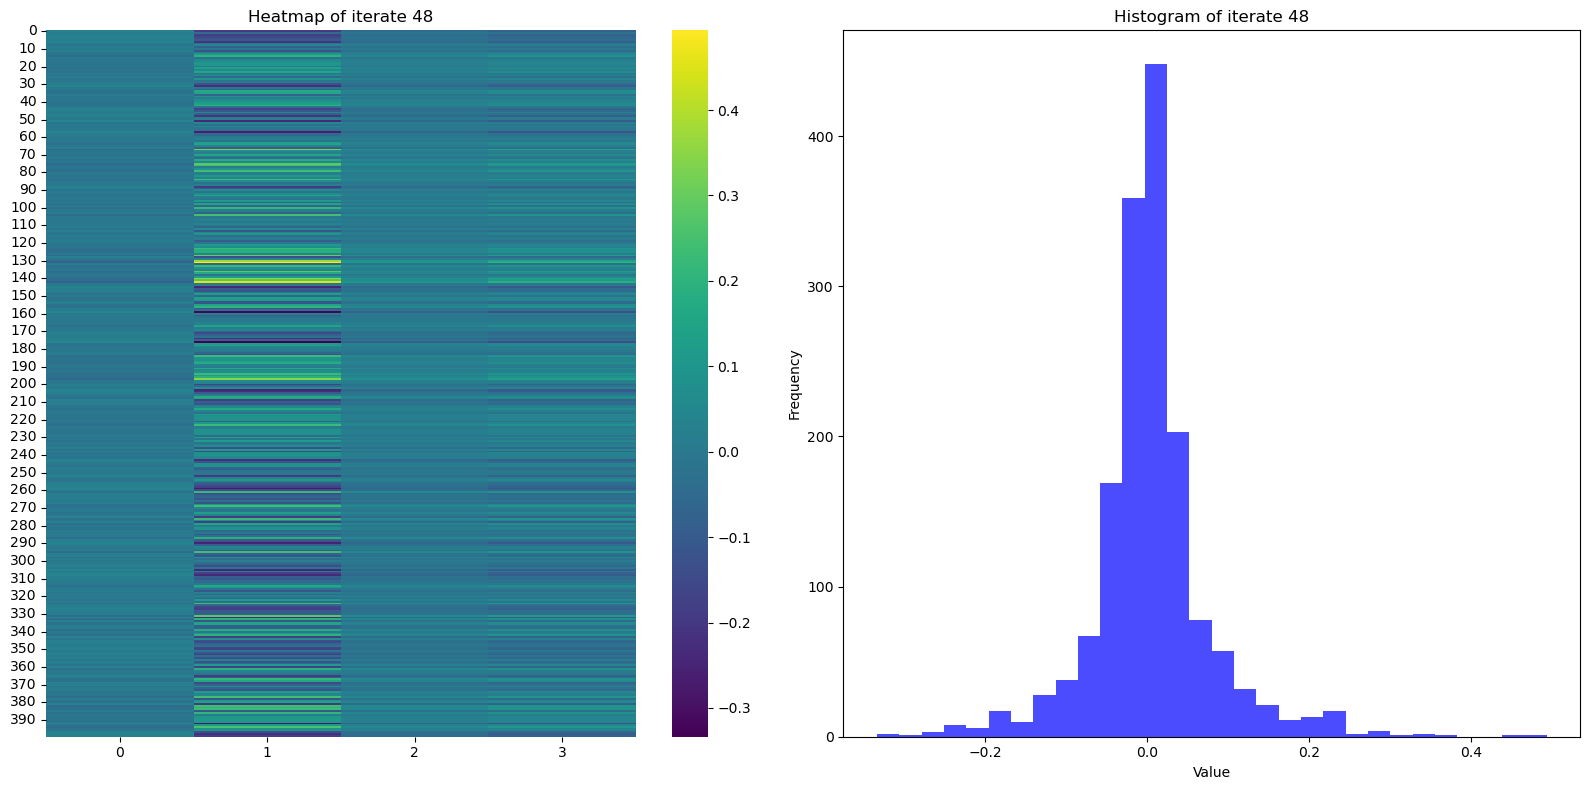

Energy of iterate 48: 2.9805615978964624


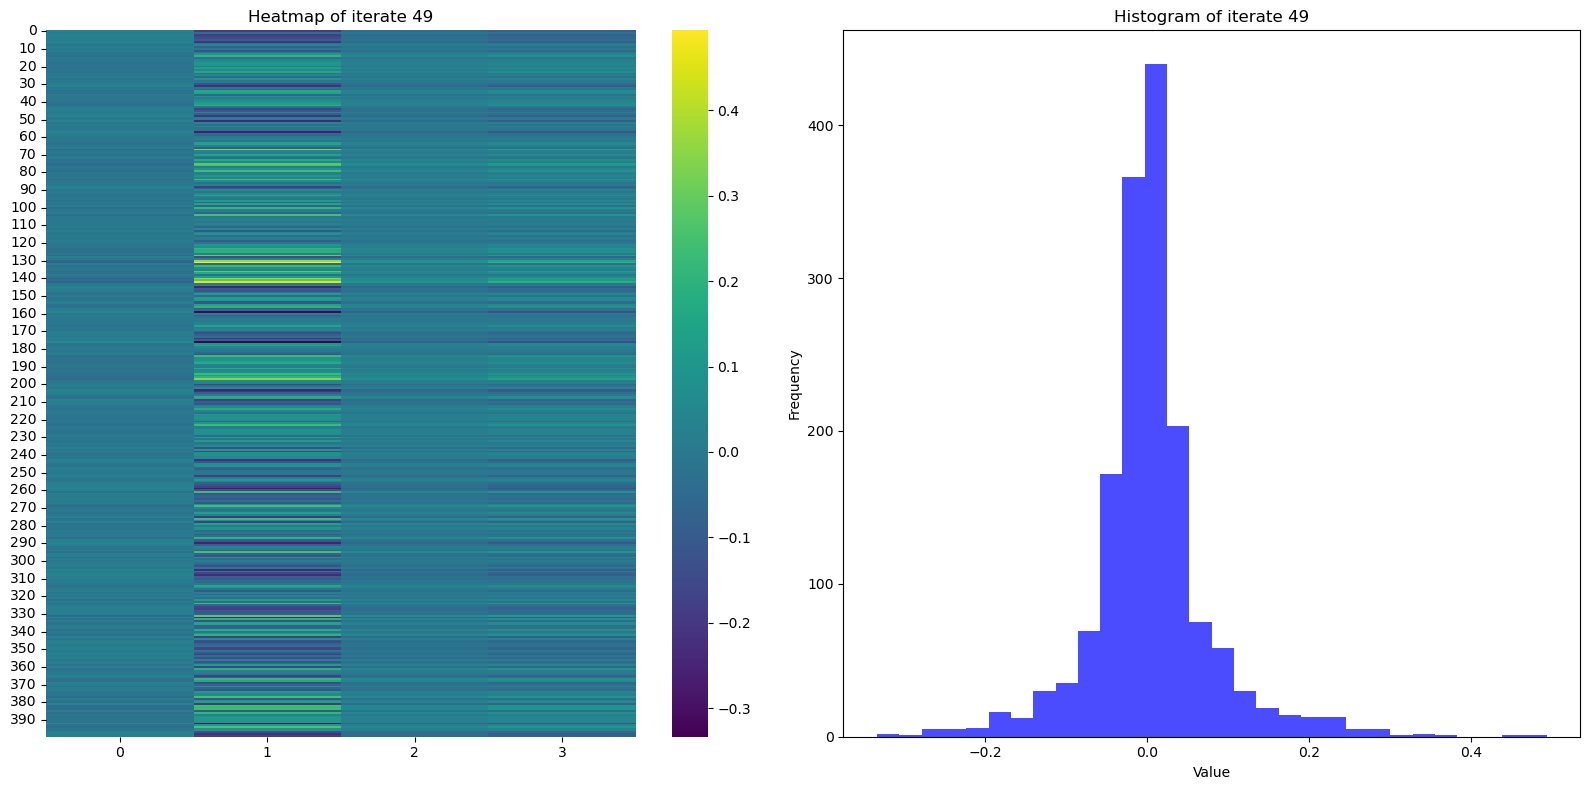

Energy of iterate 49: 2.997964739936866


1

In [36]:
## Looking at the factor matrices
separation_rank = 2
tucker_ranks = [4,4]
max_iter = 50

for i in range(max_iter):
    # Get the matrix
    iterate = iterate_level_values[0][1][i]
    
    # Create a figure with 2 subplots: one for the heatmap and one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot the heatmap on the first subplot
    sns.heatmap(iterate, cmap='viridis', cbar=True, ax=ax[0])
    ax[0].set_title(f'Heatmap of iterate {i}')
    
    # Plot the histogram on the second subplot
    ax[1].hist(iterate.flatten(), bins=30, color='blue', alpha=0.7)
    ax[1].set_title(f'Histogram of iterate {i}')
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Calculate the energy of the matrix
    energy = np.linalg.norm(iterate,'fro')
    #energy = np.sum(np.abs(eigen_values)) 
    
    print(f'Energy of iterate {i}:', energy)
s
    